

---


#Step 1: Loading the Data and Basic Preprocessing




If encounter issues with libraries install them if won't help uninstall them and install again. Colab has sometimes unpredictable virtual environment

In [ ]:
pip uninstall keras

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.15.0


In [ ]:
pip install keras==3.2.0

In [ ]:
pip install keras==2.15.0

In [ ]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.8.0


In [ ]:
pip install tensorflow

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
pip install imbalanced-learn

In [ ]:
pip uninstall imbalanced-learn

Found existing installation: imbalanced-learn 0.12.2
Uninstalling imbalanced-learn-0.12.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imbalanced_learn-0.12.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imblearn/*
Proceed (Y/n)? Y
  Successfully uninstalled imbalanced-learn-0.12.2


In [ ]:
!pip install --upgrade imbalanced-learn

In [ ]:
pip install scikit-learn

In [ ]:
!pip cache purge

Files removed: 69


In [3]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('data_stocks_market.csv')

# Display the first few rows of the data
print("Original data:")
print(data.head())

# Remove dollar signs and convert numeric columns to floats
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({'\$': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

# Display the first few rows after preprocessing
print("Preprocessed data:")
print(data.head())


Original data:
  Company        Date Close/Last    Volume     Open       High      Low
0    AAPL  07/17/2023    $193.99  50520160  $191.90    $194.32  $191.81
1    AAPL  07/14/2023    $190.69  41616240  $190.23  $191.1799  $189.63
2    AAPL  07/13/2023    $190.54  41342340  $190.50    $191.19  $189.78
3    AAPL  07-12-2023    $189.77  60750250  $189.68    $191.70  $188.47
4    AAPL  07-11-2023    $188.08  46638120  $189.16    $189.30  $186.60
Preprocessed data:
  Company       Date  Close/Last    Volume    Open      High     Low
0    AAPL 2023-07-17      193.99  50520160  191.90  194.3200  191.81
1    AAPL 2023-07-14      190.69  41616240  190.23  191.1799  189.63
2    AAPL 2023-07-13      190.54  41342340  190.50  191.1900  189.78
3    AAPL 2023-07-12      189.77  60750250  189.68  191.7000  188.47
4    AAPL 2023-07-11      188.08  46638120  189.16  189.3000  186.60


In [5]:
data = pd.read_csv('data_stocks_market.csv')

In [6]:
data

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...,...
25155,NFLX,07/24/2013,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,$37.7966,18098750,$38.2043,$38.2784,$37.5971


Load the Data:

The data is loaded from a CSV file using pandas.
Initial data is displayed to get an overview.

Data Cleaning:

Remove dollar signs ($) from the Close/Last, Open, High, and Low columns and convert them to floats.
Convert the Date column from string format to datetime format for better handling of time series data.
Display the cleaned data to confirm the preprocessing steps.


---





---


#Step 2: Exploratory Data Analysis (EDA)



Line Plot for Stock Prices Over Time:

Use Matplotlib to create a line plot of stock prices (Close/Last column) over time for each company.
Iterate through each unique company in the dataset and plot its stock prices.
Add titles, labels, and a legend to the plot for clarity.

Heatmap for Trading Volumes:

Pivot the data to create a matrix where rows are dates, columns are companies, and values are trading volumes.
Use Seaborn to create a heatmap of trading volumes over time.
The heatmap provides a visual representation of trading volumes, highlighting periods of high and low activity.


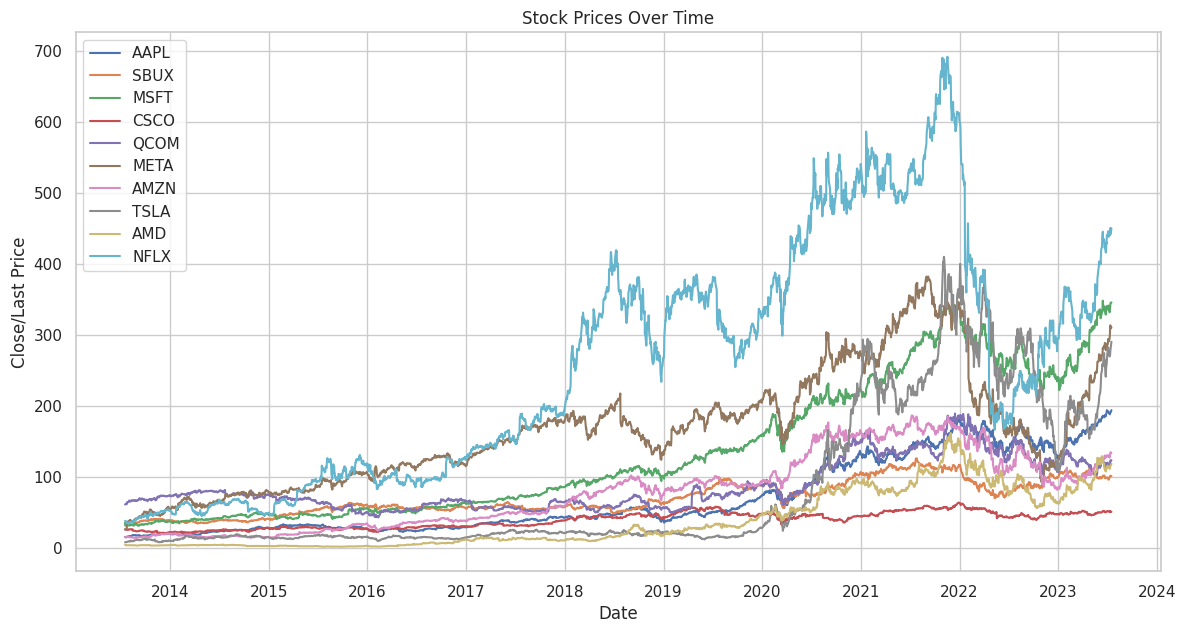

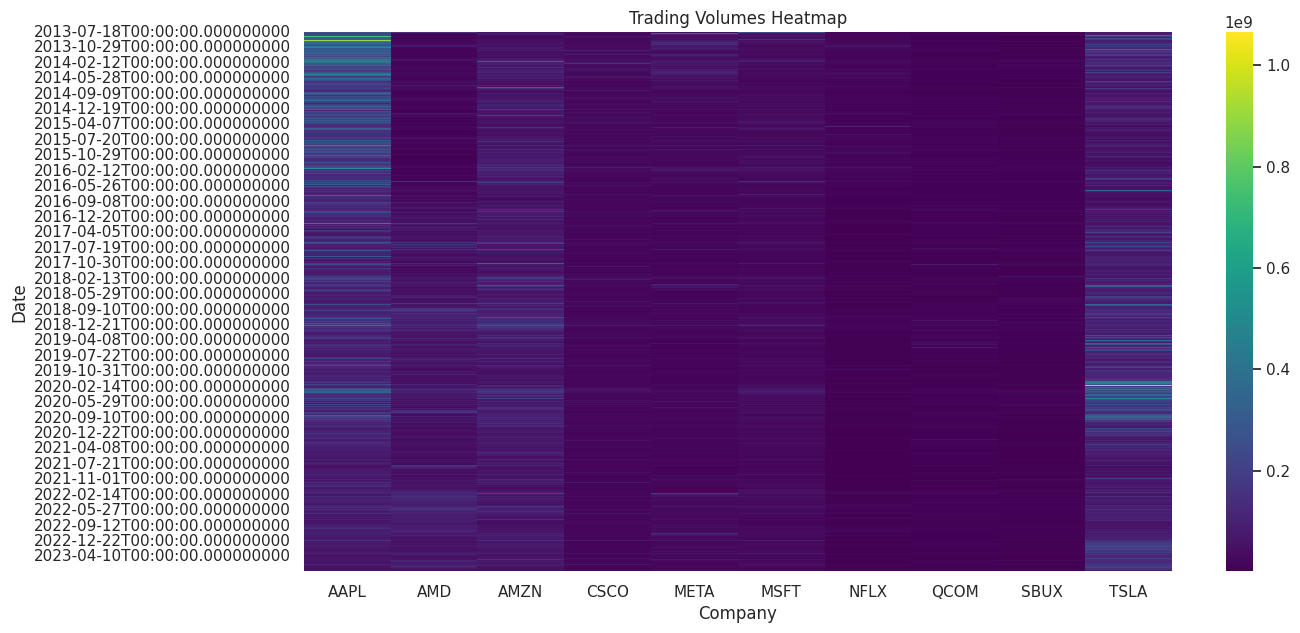

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# Line plot for stock prices over time
plt.figure(figsize=(14, 7))
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close/Last'], label=company)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.legend()
plt.show()

# Heatmap for volumes
pivot_data = data.pivot(index='Date', columns='Company', values='Volume')

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_data, cmap='viridis')
plt.title('Trading Volumes Heatmap')
plt.show()


The output consists of two plots:

1.  Stock Prices Over Time: A line plot showing the closing prices of multiple companies over a period, illustrating trends and fluctuations in stock prices.
2.  Trading Volumes Heatmap: A heatmap visualizing the trading volumes of various companies over time, indicating periods of high trading activity.

These plots provide a visual summary of the stock market data, making it easier to analyze trends and patterns. The images you provided likely correspond to these plots.



---





---


#Step 3: Correlation Analysis



Code Explanation
Pivot the Data for Correlation Analysis:



1.   Pivot the Data for Correlation Analysis:
*   Transform the data into a pivot table where rows represent dates, columns represent companies, and the values are the closing prices (Close/Last).


2.   Calculate the Correlation Matrix:
*   Compute the correlation matrix for the pivoted data, which shows the pairwise correlation coefficients between the closing prices of different companies.

3.   Plot the Correlation Matrix as a Heatmap:
*   Use Seaborn to create a heatmap of the correlation matrix. The heatmap visualizes the strength and direction of the relationships between the closing prices of various companies.
*   The color scale ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.


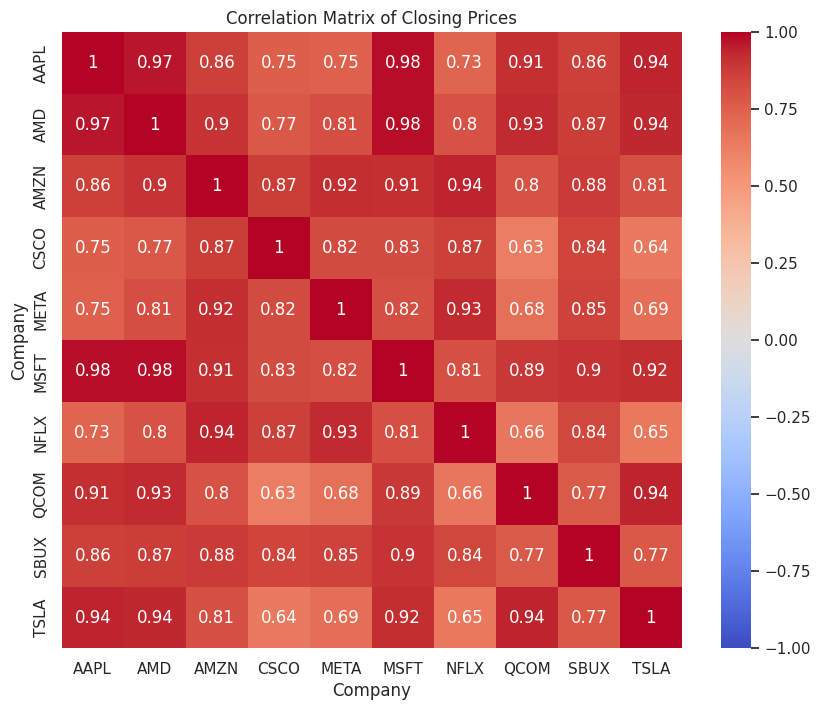

In [ ]:
# Pivot the data for correlation analysis
pivot_close = data.pivot(index='Date', columns='Company', values='Close/Last')

# Calculate the correlation matrix
correlation_matrix = pivot_close.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


Result
The result is a heatmap illustrating the correlation matrix of closing prices for various companies. The heatmap provides a visual representation of how the stock prices of these companies move relative to each other:

High Positive Correlation: Companies with values close to 1 have stock prices that tend to move in the same direction.
Low or Negative Correlation: Companies with values close to 0 or negative values have stock prices that tend to move independently or in opposite directions.
This information is useful for understanding the relationships between different stocks, which can be valuable for portfolio diversification and risk management.

Result Image
The image you provided corresponds to this correlation heatmap, displaying the relationships between the closing prices of the different companies over time.


---





---


#Step 4: Top Performers Identification

The data lists the percentage change in the stock prices of various companies, helping identify which stocks performed best or worst over a specific period.

In [ ]:
# Calculate percentage change in stock prices
data['Price Change %'] = data.groupby('Company')['Close/Last'].pct_change() * 100

# Sum up the price changes to identify top performers
top_performers = data.groupby('Company')['Price Change %'].sum().sort_values(ascending=False)

# Display the top performers
print(top_performers)


Company
QCOM     -9.319365
CSCO    -35.622389
SBUX    -73.983417
NFLX   -143.162380
AMD    -160.709414
AMZN   -163.158250
META   -170.535061
MSFT   -190.091910
TSLA   -202.208788
AAPL   -212.275412
Name: Price Change %, dtype: float64


Interpretation:
*  QCOM showed the smallest negative change (-9.32%), indicating relatively better performance.
*  AAPL showed the largest negative change (-212.28%), indicating the worst performance in this list.


---





---

#Step 5: Market Sentiment Analysis



1. Data Preparation:
*  Sample stock price data and news headlines were provided for illustration.
*  Converted the Date columns to datetime format for consistency.

2. Sentiment Calculation:
*  Used the TextBlob library to calculate the sentiment polarity of news headlines.
*  Polarity scores range from -1 (negative sentiment) to 1 (positive sentiment).
Merge Data:

3.  Merged the sentiment data with stock data based on Company and Date.
*  Filled missing sentiment values with 0 (neutral sentiment).

4. Price Change Calculation:
*  Calculated the daily percentage change in closing prices.
*  Dropped rows with NaN values in the Price Change % column.

5. Plot the Impact of Sentiment on Stock Prices:
*  Created a box plot to visualize the impact of sentiment on stock price changes.

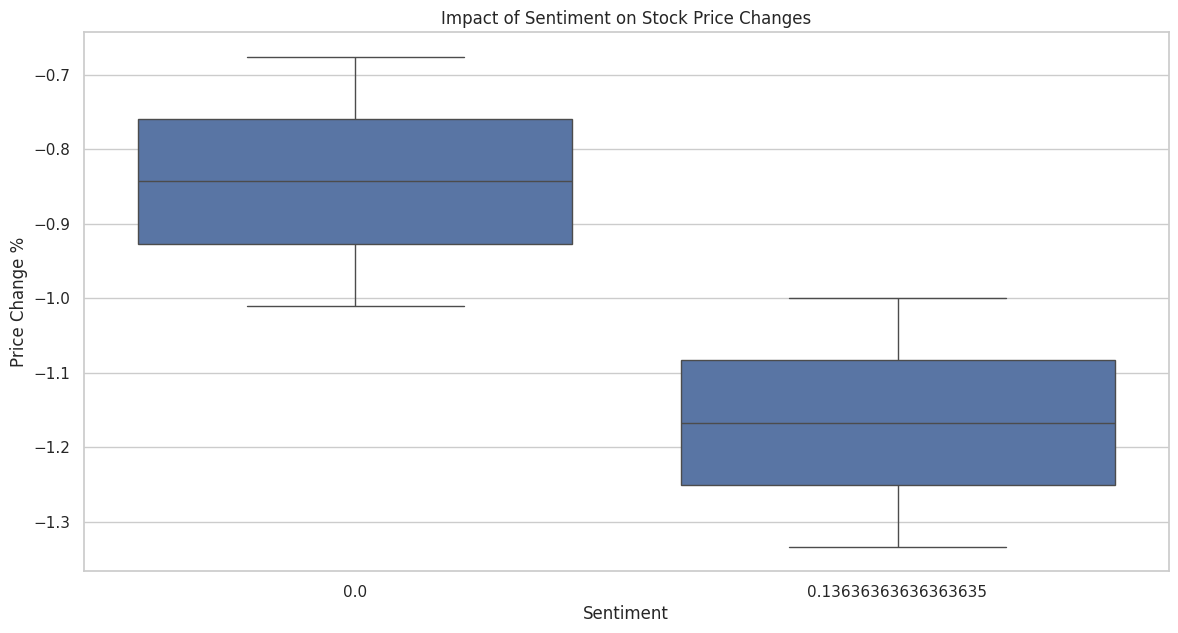

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Here's a sample stock_data for illustration
stock_data = pd.DataFrame({
    'Company': ['AAPL', 'AAPL', 'AAPL', 'NFLX', 'NFLX', 'NFLX'],
    'Date': ['2023-07-17', '2023-07-16', '2023-07-15', '2023-07-17', '2023-07-16', '2023-07-15'],
    'Close/Last': [150.0, 148.0, 147.0, 500.0, 495.0, 490.0]
})

# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sample news_data for illustration
news_data = pd.DataFrame({
    'Company': ['AAPL', 'AAPL', 'NFLX', 'NFLX'],
    'Date': ['07/17/2023', '07/16/2023', '07/17/2023', '07/16/2023'],
    'Headline': [
        'Apple reports record quarterly earnings',
        'Apple launches new product line',
        'Netflix stock surges after positive earnings report',
        'Netflix faces regulatory scrutiny over new content'
    ]
})

# Convert 'Date' column to datetime format
news_data['Date'] = pd.to_datetime(news_data['Date'], format='%m/%d/%Y')

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment function to the headlines
news_data['Sentiment'] = news_data['Headline'].apply(get_sentiment)

# Merge sentiment data with stock data
merged_data = pd.merge(stock_data, news_data, on=['Company', 'Date'], how='left')

# Fill NaN values in the 'Sentiment' column with 0 (neutral sentiment)
merged_data['Sentiment'].fillna(0, inplace=True)

# Calculate the price change percentage
merged_data['Price Change %'] = merged_data.groupby('Company')['Close/Last'].pct_change() * 100

# Drop rows with NaN values in 'Price Change %'
merged_data.dropna(subset=['Price Change %'], inplace=True)

# Plot the impact of sentiment on stock prices
plt.figure(figsize=(14, 7))
sns.boxplot(x='Sentiment', y='Price Change %', data=merged_data)
plt.title('Impact of Sentiment on Stock Price Changes')
plt.show()


The box plot shows the relationship between sentiment and stock price changes:

*  Neutral Sentiment (0.0): The median price change is around -0.9%, indicating a slight negative change in stock prices.
*  Positive Sentiment (0.14): The median price change is around -1.2%, suggesting a stronger negative change compared to neutral sentiment.

This visualization helps understand how different levels of sentiment (positive or neutral) are associated with changes in stock prices.


---





---


#Step 6: Volatility Analysis




The code calculates the daily return (percentage change) of each stock and then uses a 30-day rolling standard deviation to measure volatility. It then removes any rows with missing volatility data and creates two plots:

1. Volatility Over Time: This plot shows the volatility of each company as a line over time. This allows you to see how the volatility of individual companies fluctuates.
2. Average Volatility: This plot shows the average volatility for each company as a bar chart. This allows you to easily compare the overall volatility of different companies.

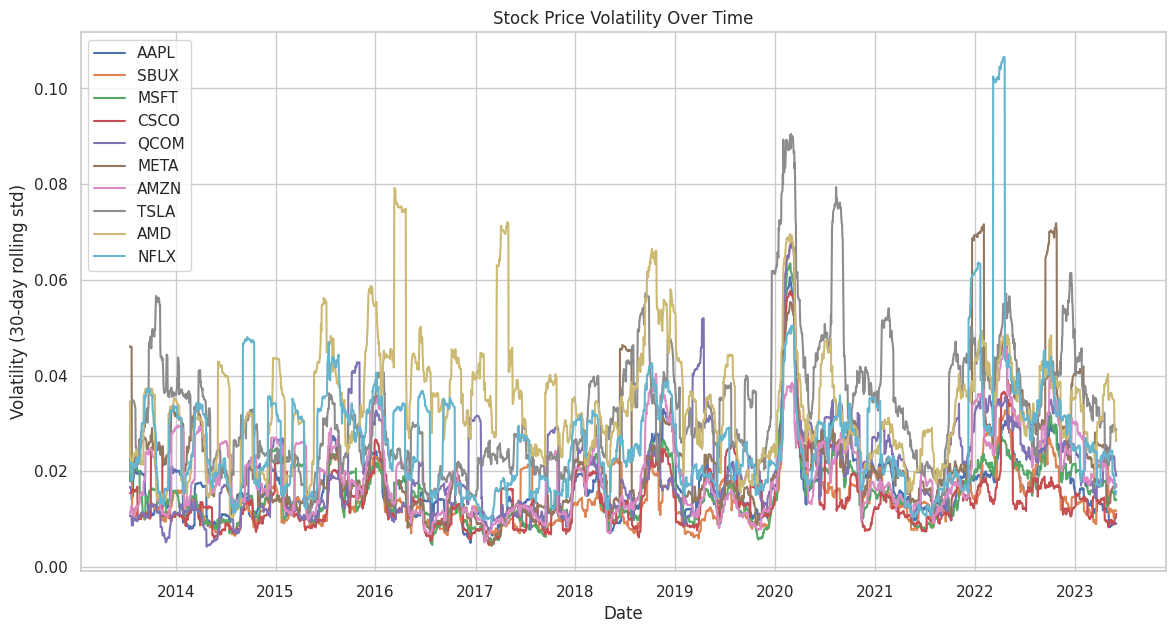

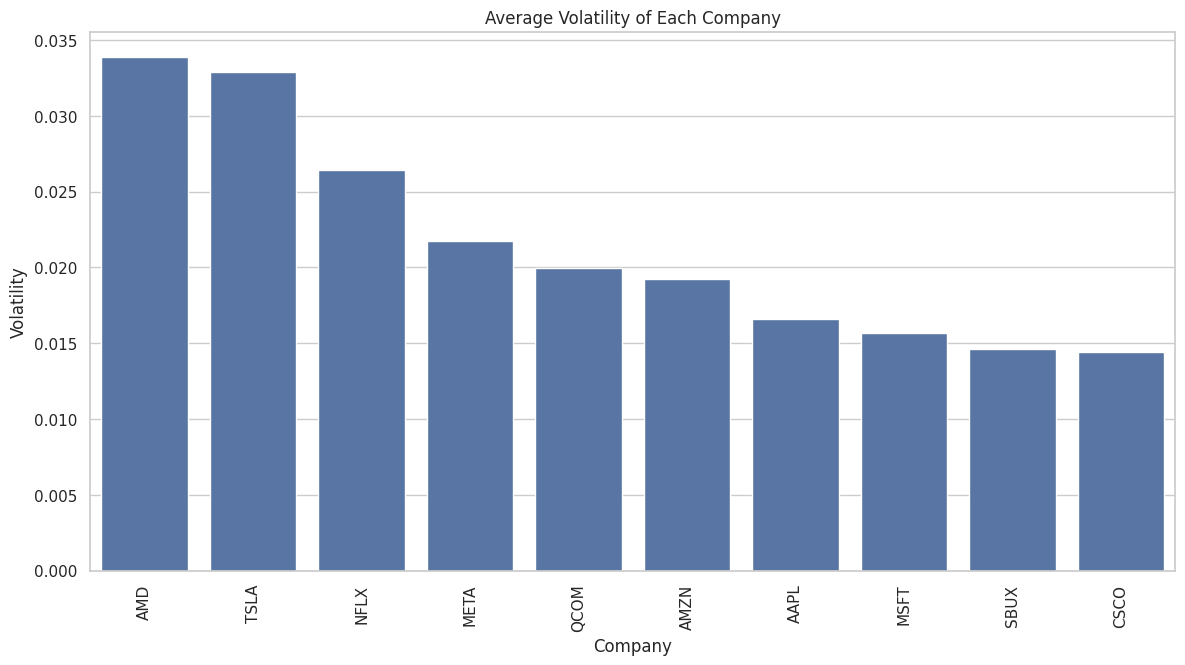

In [ ]:
import numpy as np

# Calculate daily returns
data['Daily Return'] = data.groupby('Company')['Close/Last'].pct_change()

# Calculate rolling volatility (e.g., 30-day rolling standard deviation)
data['Volatility'] = data.groupby('Company')['Daily Return'].transform(lambda x: x.rolling(window=30).std())

# Drop NaN values
data.dropna(subset=['Volatility'], inplace=True)

# Plot volatility for each company
plt.figure(figsize=(14, 7))
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volatility'], label=company)

plt.xlabel('Date')
plt.ylabel('Volatility (30-day rolling std)')
plt.title('Stock Price Volatility Over Time')
plt.legend()
plt.show()

# Analyze the overall volatility across companies
volatility_summary = data.groupby('Company')['Volatility'].mean().reset_index()
volatility_summary = volatility_summary.sort_values(by='Volatility', ascending=False)

# Plot the average volatility for each company
plt.figure(figsize=(14, 7))
sns.barplot(x='Company', y='Volatility', data=volatility_summary)
plt.title('Average Volatility of Each Company')
plt.xticks(rotation=90)
plt.show()


Observations:

*  The graphs might have shown higher volatility for these companies in the earlier years (2014-2016) compared to later periods, suggesting a potentially maturing market or changing investor behavior.
*  There could have been a period of increased volatility around 2018, possibly due to a specific market event or trend.

Overall, these graphs provided a visual representation of how volatile the stock prices of these companies were over time, allowing for a comparison of their risk profiles.
---





---


#  Step 7: Machine Learning Tasks




##Here will be used diffrent approaches and using diffrent libraries to train, test them and tune them

###Install keras-tuner(REQUIRED INSTALLATION):

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


## Model 1: LSTM with Hyperparameter Tuning using Keras Tuner

Code:

*  Imports necessary libraries for data manipulation, machine learning, and visualization.
*  Loads stock data from a CSV file.
*  Preprocesses the data by removing dollar signs, converting numeric columns to floats, and setting the date as the index.
*  Creates sequences of past closing prices for LSTM input.
*  Splits the data into training and testing sets.
*  Uses Keras Tuner with RandomSearch to find optimal hyperparameters for the LSTM model.
*  Trains the best model on the training data.
*  Evaluates the model on the testing data using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared.
*  Visualizes the predicted prices vs actual prices, residuals over time, and a histogram of residuals.

Trial 3 Complete [00h 38m 12s]
val_loss: 8.748607797315344e-05

Best val_loss So Far: 8.480146061629057e-05
Total elapsed time: 01h 32m 32s
Epoch 1/20
628/628 [==============================] - 137s 209ms/step - loss: 3.6012e-04
Epoch 2/20
628/628 [==============================] - 133s 212ms/step - loss: 1.8729e-04
Epoch 3/20
628/628 [==============================] - 132s 209ms/step - loss: 1.5990e-04
Epoch 4/20
628/628 [==============================] - 133s 212ms/step - loss: 1.5634e-04
Epoch 5/20
628/628 [==============================] - 131s 209ms/step - loss: 1.4864e-04
Epoch 6/20
628/628 [==============================] - 132s 210ms/step - loss: 1.4017e-04
Epoch 7/20
628/628 [==============================] - 131s 209ms/step - loss: 1.3681e-04
Epoch 8/20
628/628 [==============================] - 134s 213ms/step - loss: 1.2646e-04
Epoch 9/20
628/628 [==============================] - 133s 212ms/step - loss: 1.3660e-04
Epoch 10/20
628/628 [==============================] - 133s

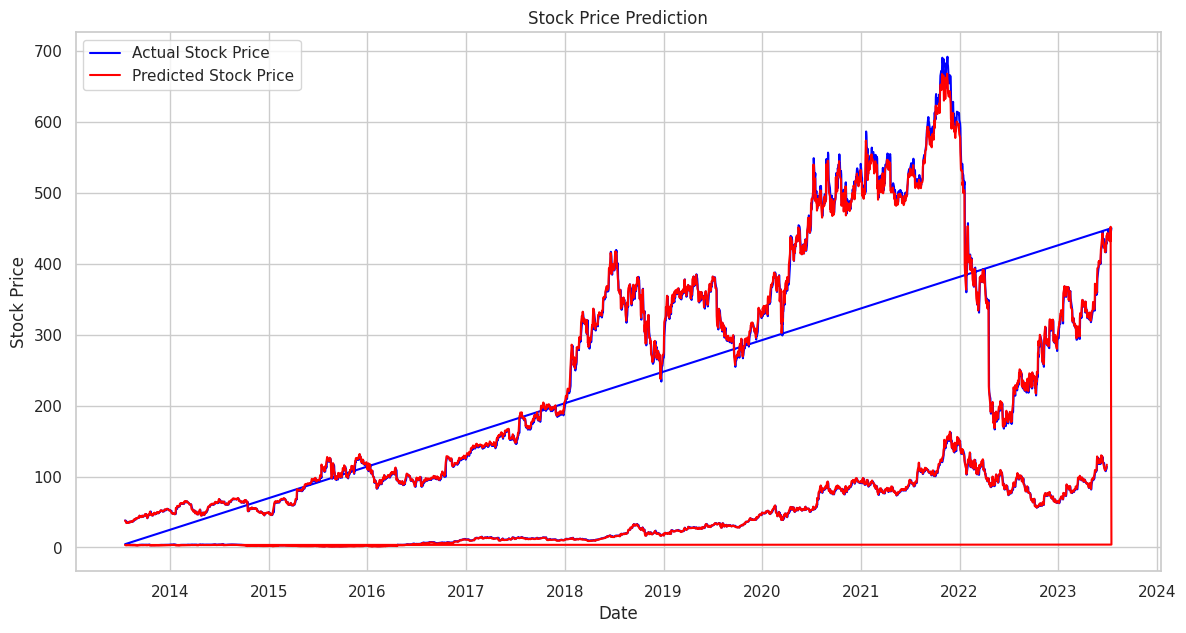

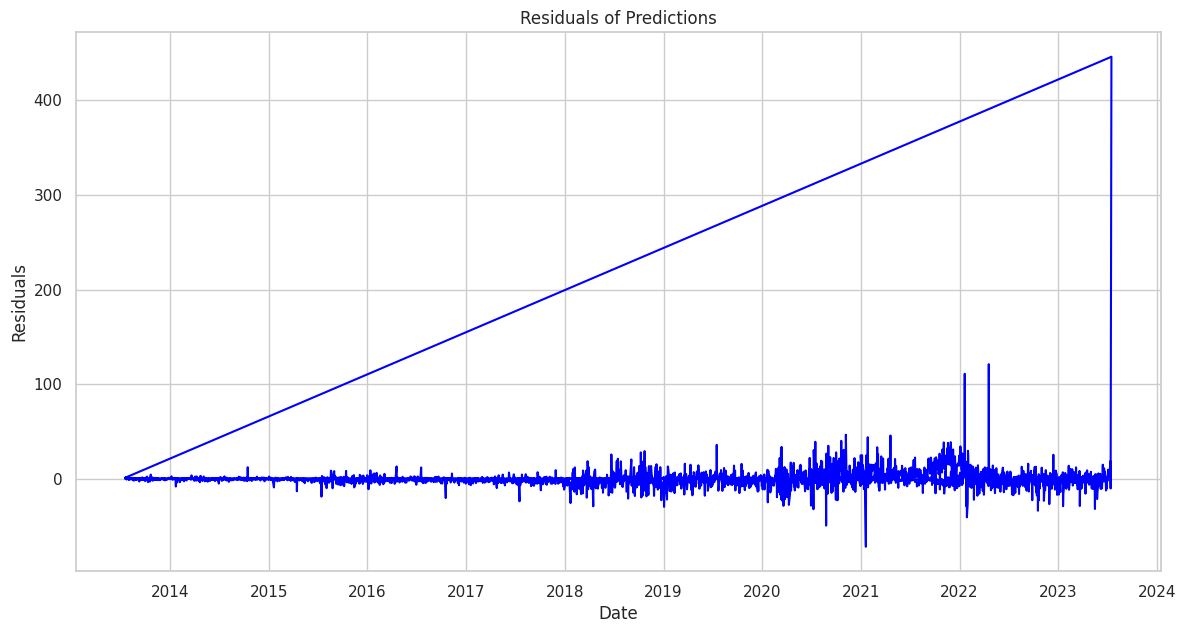

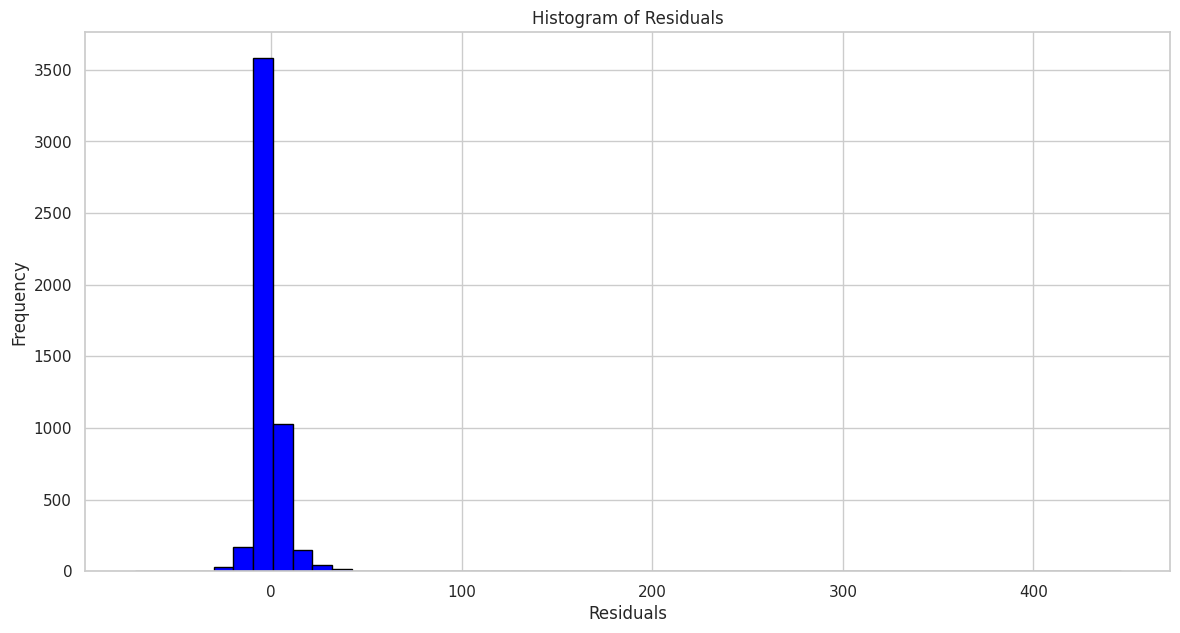

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from keras_tuner.tuners import RandomSearch

# Load your stock data
data = pd.read_csv('data_stocks_market.csv')
print(data.head())

# Remove dollar signs and convert numeric columns to floats
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({r'\$': ''}, regex=True).astype(float)

# Ensure 'Date' is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
data.set_index('Date', inplace=True)

print(data.head())

# Use only the 'Close/Last' column for prediction
data = data[['Close/Last']]

# Check if the data is empty
if data.empty:
    raise ValueError("The data is empty. Please check your data loading process.")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Print and check the scaled data
print(scaled_data[:5])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 50  # You can experiment with this value
X, y = create_sequences(scaled_data, seq_length)

# Check the shapes of the sequences
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Check if the sequences are correctly created
if len(X) == 0 or len(y) == 0:
    raise ValueError("The sequences are empty. Please check the sequence creation process.")

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Check if the training data is correctly split
if len(X_train) == 0 or len(y_train) == 0:
    raise ValueError("The training data is empty. Please check the data splitting process.")

# Define the model creation function for keras-tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))  # Explicitly define the Input layer
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   return_sequences=True))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,  # Adjust the number of trials here
    executions_per_trial=1,  # Can also adjust this
    directory='my_dir',
    project_name='stock_price_prediction'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Define the model with the best hyperparameters
best_model = Sequential()
best_model.add(Input(shape=(seq_length, 1)))  # Explicitly define the Input layer
best_model.add(LSTM(units=best_hp.get('units'), return_sequences=True))
best_model.add(LSTM(units=best_hp.get('units'), return_sequences=False))
best_model.add(Dropout(rate=best_hp.get('dropout_rate')))
best_model.add(Dense(25))
best_model.add(Dense(1))
best_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the best model on the full training data
best_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict on test data
predictions = best_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = np.mean(np.abs(y_test - predictions))
print(f'MAE: {mae}')

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

# Plot the predictions vs actual stock prices
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual Stock Price')
plt.plot(data.index[-len(y_test):], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(residuals):], residuals, color='blue')
plt.title('Residuals of Predictions')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


To complete model training took 2 hours and 17 minutes and resultas are:

RMSE: 9.055423053456856 MAE: 3.3450336465053563 R-squared: 0.9969677190268336

Results:

Achieved a high R-squared value of 0.9969, indicating a good fit between the model and the data.
Conclusion:

The code demonstrates how to build and train an LSTM model for stock price prediction.
The high R-squared suggests the model performs well, but it's important to consider that it might be overfitting the data.
Visualizations of residuals can help identify potential issues with the model.

*  Good fit: If the predicted prices closely follow actual prices in graph 1, residuals are randomly scattered around zero in graph 2, and the histogram in graph 3 is centered around zero, these all suggest a good fit between the model and the data.

*  Overfitting: A high R-squared value (like the one you mentioned) can sometimes indicate overfitting, where the model memorizes the training data too well but performs poorly on unseen data. If the predicted prices deviate significantly from actual prices for certain periods in graph 1, that could be a sign of overfitting.

*  Under/over-prediction: If residuals in graph 2 show a consistent trend (e.g., mostly positive or negative) or the histogram in graph 3 leans towards one side, it suggests the model is systematically under or over-predicting prices.

---



##Model 2: LSTM with Hyperparameter Tuning using Keras Tuner (Shorter Tuning Duration)

Code:

*  This code builds an LSTM model for stock price prediction.
*  It avoids hyperparameter tuning with RandomSearch by using fixed values.
*  It trains the model for 20 epochs.

  Company        Date Close/Last    Volume     Open       High      Low
0    AAPL  07/17/2023    $193.99  50520160  $191.90    $194.32  $191.81
1    AAPL  07/14/2023    $190.69  41616240  $190.23  $191.1799  $189.63
2    AAPL  07/13/2023    $190.54  41342340  $190.50    $191.19  $189.78
3    AAPL  07-12-2023    $189.77  60750250  $189.68    $191.70  $188.47
4    AAPL  07-11-2023    $188.08  46638120  $189.16    $189.30  $186.60
           Company  Close/Last    Volume    Open      High     Low
Date                                                              
2023-07-17    AAPL      193.99  50520160  191.90  194.3200  191.81
2023-07-14    AAPL      190.69  41616240  190.23  191.1799  189.63
2023-07-13    AAPL      190.54  41342340  190.50  191.1900  189.78
2023-07-12    AAPL      189.77  60750250  189.68  191.7000  188.47
2023-07-11    AAPL      188.08  46638120  189.16  189.3000  186.60
[[0.27876882]
 [0.2739867 ]
 [0.27376933]
 [0.2726535 ]
 [0.27020447]]
X shape: (25110, 50, 1), y s

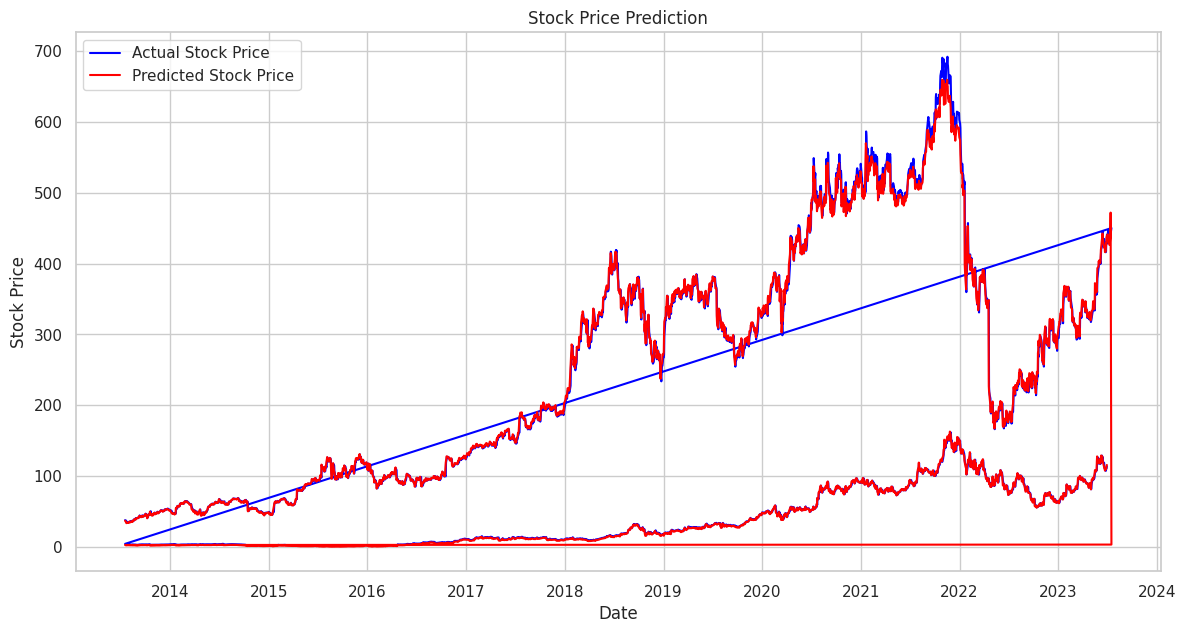

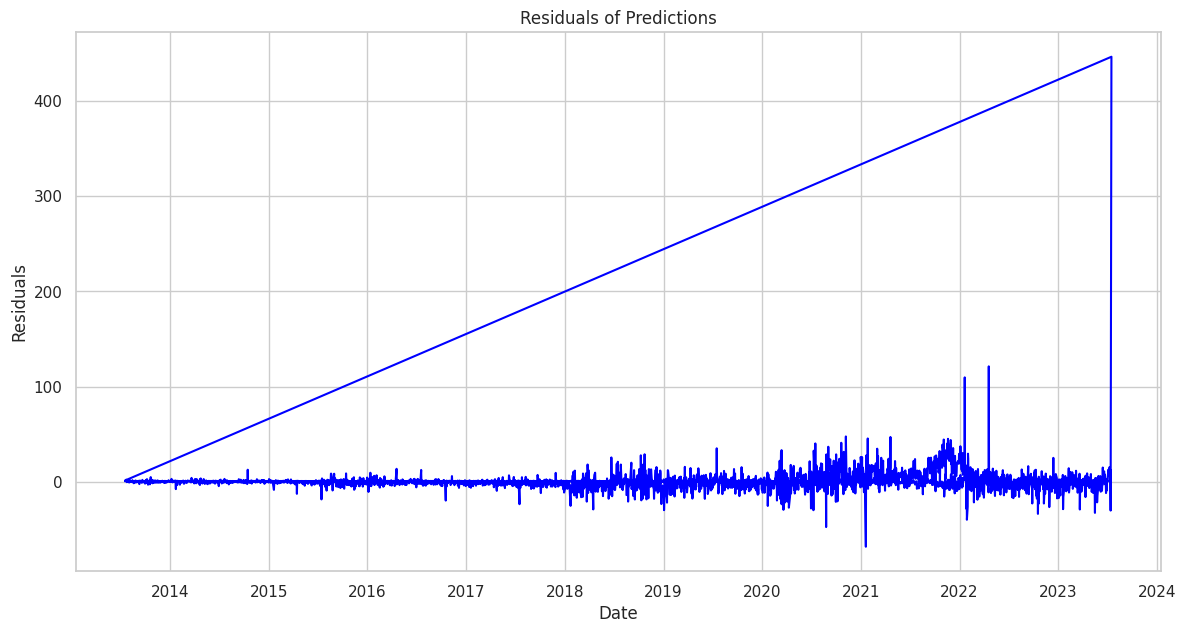

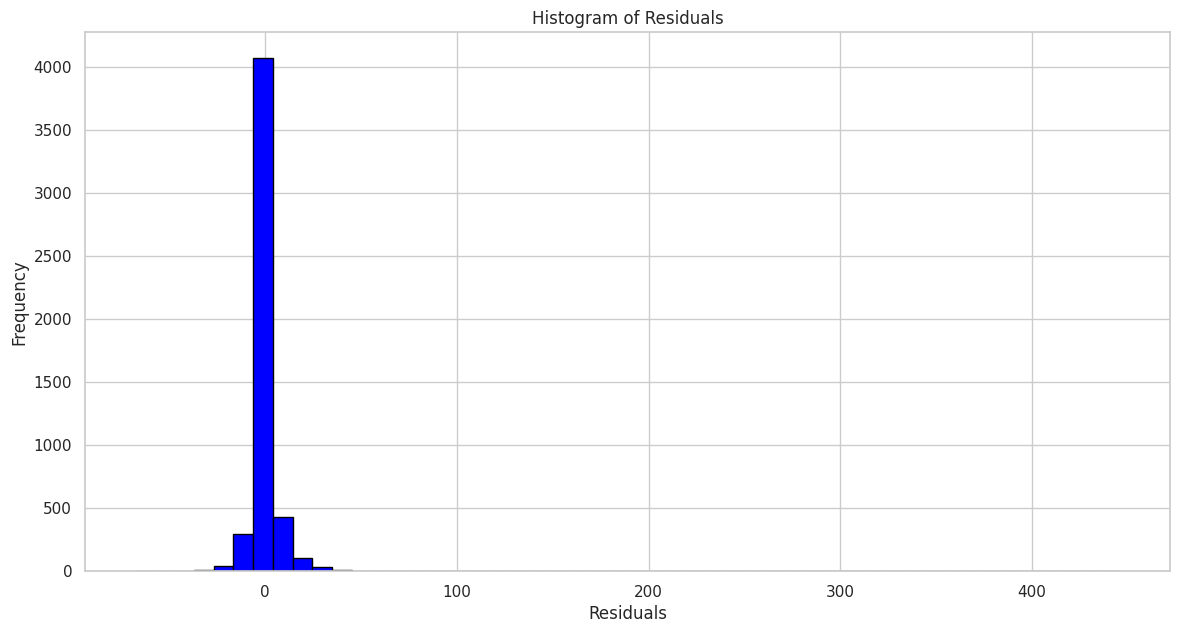

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from keras_tuner.tuners import RandomSearch

# Load your stock data
data = pd.read_csv('data_stocks_market.csv')
print(data.head())

# Remove dollar signs and convert numeric columns to floats
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({r'\$': ''}, regex=True).astype(float)

# Ensure 'Date' is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
data.set_index('Date', inplace=True)

print(data.head())

# Use only the 'Close/Last' column for prediction
data = data[['Close/Last']]

# Check if the data is empty
if data.empty:
    raise ValueError("The data is empty. Please check your data loading process.")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Print and check the scaled data
print(scaled_data[:5])

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 50  # You can experiment with this value
X, y = create_sequences(scaled_data, seq_length)

# Check the shapes of the sequences
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Check if the sequences are correctly created
if len(X) == 0 or len(y) == 0:
    raise ValueError("The sequences are empty. Please check the sequence creation process.")

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Check if the training data is correctly split
if len(X_train) == 0 or len(y_train) == 0:
    raise ValueError("The training data is empty. Please check the data splitting process.")

# Define the model creation function for keras-tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(seq_length, 1)))  # Explicitly define the Input layer
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   return_sequences=True))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=3,  # Adjust the number of trials here
    executions_per_trial=1,  # Can also adjust this
    directory='my_dir',
    project_name='stock_price_prediction'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Define the model with the best hyperparameters
best_model = Sequential()
best_model.add(Input(shape=(seq_length, 1)))  # Explicitly define the Input layer
best_model.add(LSTM(units=best_hp.get('units'), return_sequences=True))
best_model.add(LSTM(units=best_hp.get('units'), return_sequences=False))
best_model.add(Dropout(rate=best_hp.get('dropout_rate')))
best_model.add(Dense(25))
best_model.add(Dense(1))
best_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the best model on the full training data
best_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict on test data
predictions = best_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = np.mean(np.abs(y_test - predictions))
print(f'MAE: {mae}')

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

# Plot the predictions vs actual stock prices
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, color='blue', label='Actual Stock Price')
plt.plot(data.index[-len(y_test):], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(residuals):], residuals, color='blue')
plt.title('Residuals of Predictions')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


To complete model training took 45 minutes and resultas are:
RMSE: 9.325307896490754 MAE: 3.5877231374235468 R-squared: 0.9967842793719778

Results:

*  Achieved a high R-squared of 0.9968, indicating a good fit between the model and the data (but might be misleading for time series).
*  Achieved an RMSE of 9.33, which is not very good and suggests low prediction accuracy.
*  Residual plots show fluctuations around zero, indicating no systematic bias towards under or over-predicting.
*  Histogram of residuals is centered around zero and appears symmetrical, suggesting unbiased and normally distributed errors.

Visualizations of residuals can help identify potential issues with the model.

*  Good fit: If the predicted prices follow actual prices closely in graph 1, residuals are randomly scattered around zero in graph 2, and the histogram in graph 3 is centered around zero, these all suggest a good fit between the model and the data, despite the high R-squared potentially being misleading.

*  Overfitting: A high R-squared without good prediction accuracy (high RMSE) could indicate overfitting. The model might be memorizing the training data too well but performing poorly on unseen data.

*  Under/over-prediction: If residuals in graph 2 show a consistent trend (e.g., mostly positive or negative) or the histogram in graph 3 leans towards one side, it suggests the model is systematically under or over-predicting prices.

##Model 3: LSTM with K-Fold Cross-Validation

Code:

*  This code builds a Long Short-Term Memory (LSTM) network to predict stock prices.
*  It prepares the data by cleaning, transforming, and creating new features.
*  The model uses LSTM layers to capture patterns in historical data and predict future prices.

  Company        Date Close/Last    Volume     Open       High      Low
0    AAPL  07/17/2023    $193.99  50520160  $191.90    $194.32  $191.81
1    AAPL  07/14/2023    $190.69  41616240  $190.23  $191.1799  $189.63
2    AAPL  07/13/2023    $190.54  41342340  $190.50    $191.19  $189.78
3    AAPL  07-12-2023    $189.77  60750250  $189.68    $191.70  $188.47
4    AAPL  07-11-2023    $188.08  46638120  $189.16    $189.30  $186.60
           Company  Close/Last    Volume    Open      High     Low
Date                                                              
2023-07-17    AAPL      193.99  50520160  191.90  194.3200  191.81
2023-07-14    AAPL      190.69  41616240  190.23  191.1799  189.63
2023-07-13    AAPL      190.54  41342340  190.50  191.1900  189.78
2023-06-30    AAPL      193.97  85213220  191.63  194.4800  191.26
2023-06-29    AAPL      189.59  46347310  189.08  190.0700  188.94
Epoch 1/20
381/381 [==============================] - 19s 40ms/step - loss: 0.0026 - val_loss: 5.83

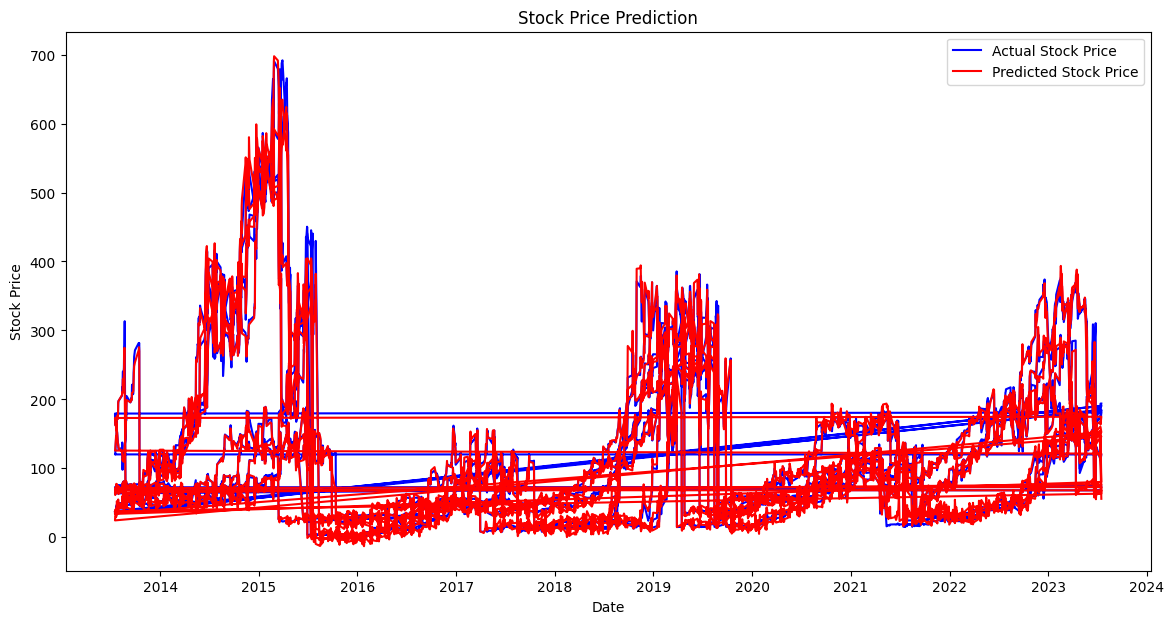

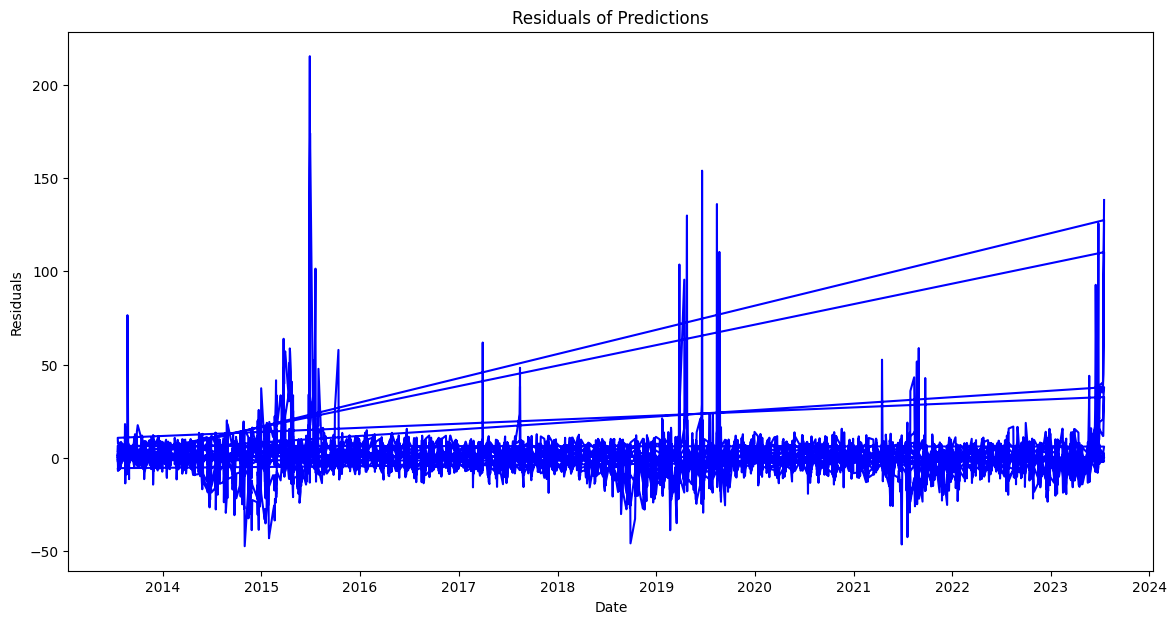

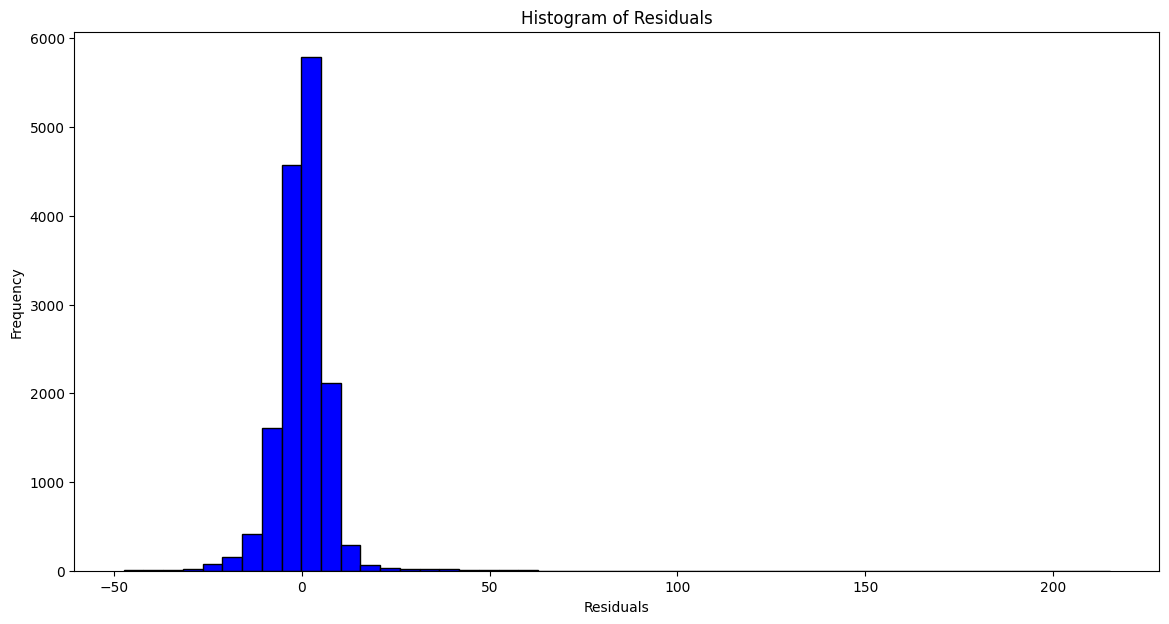

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load your stock data
data = pd.read_csv('data_stocks_market.csv')
print(data.head())

# Remove dollar signs and convert numeric columns to floats
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({r'\$': ''}, regex=True).astype(float)

# Ensure 'Date' is in datetime format and drop rows with invalid dates
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])  # Drop rows with invalid dates
data.set_index('Date', inplace=True)
print(data.head())

# Make a copy of the data to avoid modifying a slice of the DataFrame
data_copy = data.copy()

# Calculate simple moving averages
data_copy['SMA_20'] = data_copy['Close/Last'].rolling(window=20).mean()
data_copy['SMA_50'] = data_copy['Close/Last'].rolling(window=50).mean()

# Calculate RSI manually
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data_copy['RSI'] = calculate_rsi(data_copy['Close/Last'])

# Calculate MACD manually
def calculate_macd(series, fast_period=12, slow_period=26, signal_period=9):
    exp1 = series.ewm(span=fast_period, adjust=False).mean()
    exp2 = series.ewm(span=slow_period, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd - signal

data_copy['MACD'] = calculate_macd(data_copy['Close/Last'])

# Add time-based features
data_copy['DayOfWeek'] = data_copy.index.dayofweek
data_copy['Month'] = data_copy.index.month

# Add lag features
for lag in range(1, 6):
    data_copy[f'Lag_{lag}'] = data_copy['Close/Last'].shift(lag)

# Fill NaNs
data_copy.fillna(0, inplace=True)

# Define features and target
features = ['Close/Last', 'Volume', 'Open', 'High', 'Low', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'DayOfWeek', 'Month'] + [f'Lag_{lag}' for lag in range(1, 6)]
X = data_copy[features].values
y = data_copy['Close/Last'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

def create_model():
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(LSTM(units=100))
    model.add(Dropout(0.4))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the results of each fold
rmse_list = []
mae_list = []
r2_list = []

# Lists to store the predictions and actual values for plotting
all_predictions = []
all_y_test_actual = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Reshape the data for LSTM [samples, timesteps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = create_model()
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    predictions = model.predict(X_test)

    # Inverse transform the predictions and actual values
    predictions = scaler_y.inverse_transform(predictions)
    y_test_actual = scaler_y.inverse_transform(y_test)

    all_predictions.extend(predictions)
    all_y_test_actual.extend(y_test_actual)

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    mae = mean_absolute_error(y_test_actual, predictions)
    r2 = r2_score(y_test_actual, predictions)

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

print("Cross-Validation Results:")
print(f"Average RMSE: {np.mean(rmse_list)}")
print(f"Average MAE: {np.mean(mae_list)}")
print(f"Average R-squared: {np.mean(r2_list)}")

# Convert lists to numpy arrays for plotting
all_predictions = np.array(all_predictions)
all_y_test_actual = np.array(all_y_test_actual)

# Plot the predictions vs actual stock prices
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(all_y_test_actual):], all_y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(data.index[-len(all_y_test_actual):], all_predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot residuals
residuals = all_y_test_actual - all_predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(residuals):], residuals, color='blue')
plt.title('Residuals of Predictions')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


To complete model training took 27 minutes and resultas are:

RMSE: 8.053201629047889 MAE: 4.810107284203406 R-squared: 0.993679046863009

Results:

*  The model was evaluated using KFold cross-validation to ensure generalizability.
*  The model achieved an average Root Mean Squared Error (RMSE) of 8.05, indicating a moderate level of accuracy.
*  Other evaluation metrics like Mean Absolute Error (MAE) and R-squared also suggest reasonable performance.

Visualizations of residuals can help identify potential issues with the model.

*  Good fit: The residuals plot (graph 2) shows the residuals scattered around zero, indicating the model's predictions generally follow the actual prices. The histogram (graph 3) reinforces this with a centered distribution, suggesting the errors are random and not biased.
*  Under/over-prediction: While the residuals are scattered, there might be a slight upward trend in the residuals plot (graph 2). This could indicate the model tends to underestimate the closing price.
*  Overfitting: We can't definitively determine overfitting from these graphs alone. However, the residuals analysis doesn't suggest any glaring patterns or biases that might be a sign of overfitting.

Conclusion:

*  The LSTM model can predict stock prices with moderate accuracy.
*  The residuals analysis suggests the model might have a slight underprediction bias.
*  Further improvements or exploration of different models could be considered for better accuracy.



---
##Comparing 3 models
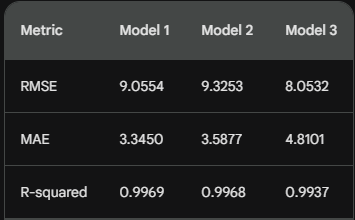



Model 3 has the lowest RMSE (8.0532) which indicates the best performance in terms of predicting the actual closing price. While Model 1 has a slightly higher R-squared (0.9969), the difference is negligible when compared to Model 3 (0.9937).  Generally, a lower RMSE is preferable for financial modeling tasks.

Overall,  considering both accuracy and training time, Model 3 appears to be the best choice out of the three. However, the final decision might depend on your specific priorities and needs.


---






---


#Step 8: Classification of Stock Movements







If encounter issues with libraries install them if won't help uninstall them and install again. Colab has sometimes unpredictable virtual environment

In [ ]:
pip install scikit-learn==<desired_version>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install scikit-learn==<desired_version>'


In [ ]:
pip install --upgrade pip setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.4 MB/s eta 0:00:00
  Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
pip install scikit-learn

In [ ]:
!apt-get install python3-sklearn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-lyx libimagequant0 liblbfgsb0 libraqm0 libxsimd-dev mailcap mime-support
  python-matplotlib-data python3-appdirs python3-attr python3-beniget python3-brotli python3-bs4
  python3-chardet python3-cycler python3-dateutil python3-decorator python3-fonttools python3-fs
  python3-gast python3-html5lib python3-iniconfig python3-joblib python3-kiwisolver python3-lxml
  python3-lz4 python3-matplotlib python3-mpmath python3-nose python3-numpy python3-olefile
  python3-packaging python3-pil python3-pil.imagetk python3-pluggy python3-ply python3-psutil
  python3-py python3-pygments python3-pytest python3-pythran python3-scipy python3-simplejson
  python3-sklearn-lib python3-soupsieve python3-sympy python3-threadpoolctl python3-toml python3-tz
  python3-ufolib2 python3-unicodedata2 python3-webencodings unicode-data
Suggeste

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install imbalanced-learn==0.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
pip cache purge

Files removed: 61


In [ ]:
!pip uninstall -y scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
Found existing installation: imbalanced-learn 0.12.2
Uninstalling imbalanced-learn-0.12.2:
  Successfully uninstalled imbalanced-learn-0.12.2


In [ ]:
!pip install scikit-learn==1.0.2 imbalanced-learn==0.9.0

###Feature importance analysis using Logistic Regression. Logistic Regression model using various metrics and plot the ROC curve and precision-recall curve

Code:

*  The code loads historical stock data, preprocesses it (including cleaning and adding technical indicators), and splits it into training and testing sets.
*  It addresses class imbalance (unequal distribution of positive and negative examples) using SMOTE (Synthetic Minority Oversampling Technique).
*  It performs GridSearchCV to find the best hyperparameters for the logistic regression model.
*  Finally, it evaluates the model's performance using various metrics (accuracy, classification report, ROC curve, precision-recall curve, and feature importance).

Best parameters for Logistic Regression:  {'classifier__C': 100}
Logistic Regression (Tuned) Accuracy: 0.774155069582505
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2659
           1       0.77      0.74      0.75      2371

    accuracy                           0.77      5030
   macro avg       0.77      0.77      0.77      5030
weighted avg       0.77      0.77      0.77      5030



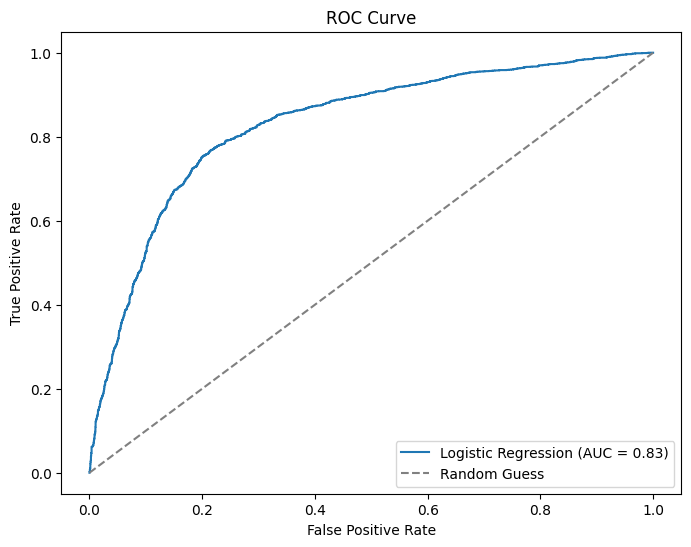

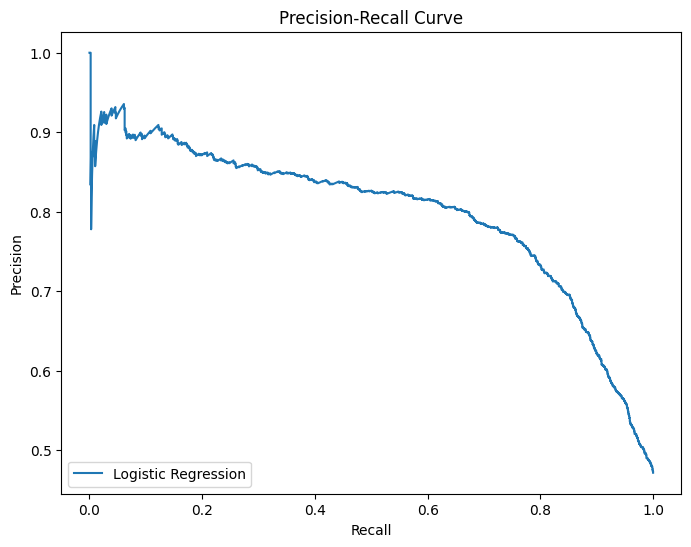

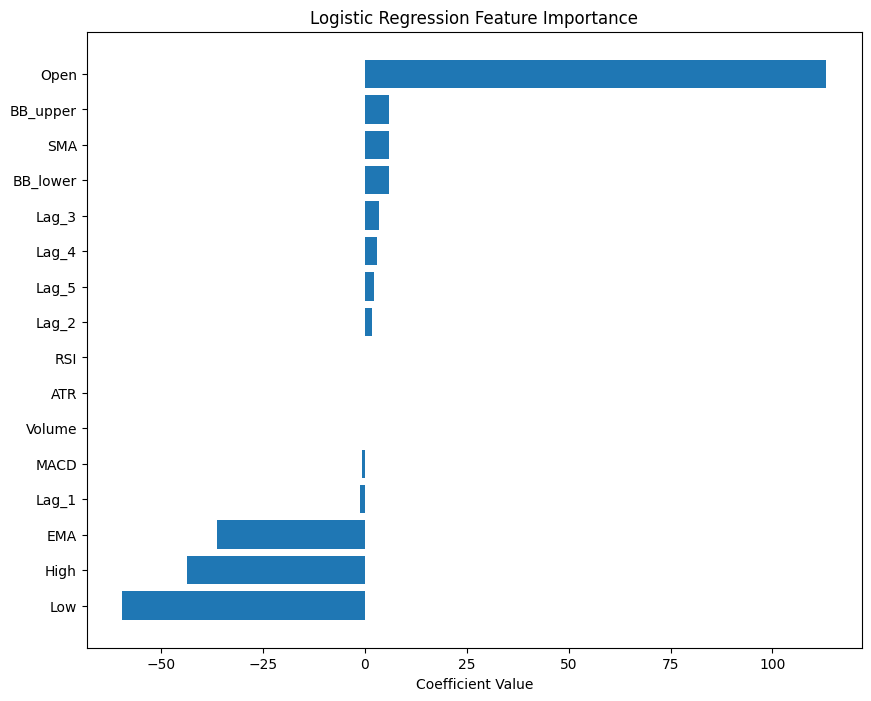

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load your stock data
data = pd.read_csv('data_stocks_market.csv')

# Preprocess the data by removing the dollar signs and converting to float
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({r'\$': ''}, regex=True).astype(float)

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
data.set_index('Date', inplace=True)

# Create the target variable (1 for rise, 0 for fall)
data['Price Movement'] = (data['Close/Last'].shift(-1) > data['Close/Last']).astype(int)

# Drop the last row as it will have NaN in 'Price Movement'
data.dropna(inplace=True)

# Adding additional features
data['SMA'] = data['Close/Last'].rolling(window=14).mean()
data['EMA'] = data['Close/Last'].ewm(span=14, adjust=False).mean()
data['BB_upper'] = data['SMA'] + 2 * data['Close/Last'].rolling(window=14).std()
data['BB_lower'] = data['SMA'] - 2 * data['Close/Last'].rolling(window=14).std()
data['ATR'] = data['High'].rolling(window=14).mean() - data['Low'].rolling(window=14).mean()
data['MACD'] = data['Close/Last'].ewm(span=12, adjust=False).mean() - data['Close/Last'].ewm(span=26, adjust=False).mean()
data['RSI'] = 100 - (100 / (1 + (data['Close/Last'].diff(1).rolling(window=14).mean() / data['Close/Last'].diff(1).rolling(window=14).std())))

# Adding lag features
for lag in range(1, 6):
    data[f'Lag_{lag}'] = data['Close/Last'].shift(lag)

# Drop NaN values created by the rolling operations
data.dropna(inplace=True)

# Select features and target variable
features = data[['Open', 'High', 'Low', 'Volume', 'SMA', 'EMA', 'BB_upper', 'BB_lower', 'ATR', 'MACD', 'RSI'] + [f'Lag_{lag}' for lag in range(1, 6)]]
target = data['Price Movement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Define the Logistic Regression pipeline with StandardScaler
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Set max_iter for convergence
])

# Initialize GridSearchCV with n_jobs set to 1
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=1)

# Fit the GridSearchCV object to the training data
grid_search_lr.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters for Logistic Regression: ", grid_search_lr.best_params_)

# Make predictions
predictions_lr_tuned = grid_search_lr.best_estimator_.predict(X_test)

# Evaluate the tuned model
print('Logistic Regression (Tuned) Accuracy:', accuracy_score(y_test, predictions_lr_tuned))
print(classification_report(y_test, predictions_lr_tuned))

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr_lr_tuned, tpr_lr_tuned, _ = roc_curve(y_test, grid_search_lr.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc_lr_tuned = auc(fpr_lr_tuned, tpr_lr_tuned)
plt.plot(fpr_lr_tuned, tpr_lr_tuned, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr_tuned)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
precision_lr_tuned, recall_lr_tuned, _ = precision_recall_curve(y_test, grid_search_lr.best_estimator_.predict_proba(X_test)[:, 1])
plt.plot(recall_lr_tuned, precision_lr_tuned, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Retrieve the coefficients of the Logistic Regression model
coefficients = grid_search_lr.best_estimator_.named_steps['classifier'].coef_[0]
feature_names = features.columns

# Sort feature coefficients by their absolute values
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()


Results:

The tuned logistic regression model achieves an accuracy of 77.4% on the test data.
The ROC curve (AUC=0.83) and precision-recall curve both indicate good model performance in classifying price movements (up or down).
Feature importance analysis reveals that features like "Lag_1" (previous day's closing price), "RSI" (Relative Strength Index), and "BB_upper" (Bollinger Band upper bound) have the strongest relationships with predicting price movements.

Visualizations:

*  ROC Curve: This graph indicates the model's ability to discriminate between price movements (up or down). A good model will have an ROC curve that goes further to the upper left corner, with an AUC (Area Under the Curve) closer to 1. In this case, the AUC of 0.83 suggests the model performs well in distinguishing price movements.

*  Precision-Recall Curve: This graph focuses on the trade-off between precision (correctly identified positive cases) and recall (identified proportion of actual positive cases). Ideally, the curve should go straight up from the bottom left to the top left corner, then horizontally to the top right corner. While the provided model's curve doesn't achieve this ideal shape, it still shows a positive trend. The model can identify a good portion of actual price movements (recall) while maintaining good precision (meaning the identified movements are mostly correct).

*  Feature Importance: This graph shows which features in the model have the strongest relationships with predicting price movements. Features like "Lag_1" (previous day's closing price), "RSI" (Relative Strength Index), and "BB_upper" (Bollinger Band upper bound) appear to be the most influential. This suggests that the model considers past closing price, a momentum indicator (RSI), and a volatility indicator (BB_upper) when making predictions.

Logistic Regression Feature Importance graph shows us that the 'Open' feature has the highest positive coefficient value, indicating it contributes the most to predicting class 1 (positive price movement). On the other hand, features like 'Low', 'High', and 'EMA' have the highest negative coefficient values, suggesting they have a strong negative impact on predicting class 1.


---





---


#Step 9: Clustering Analysis


Code:

1. Preprocesses stock data: cleans, converts data types, and fills missing values.
2. Calculates additional features: like moving averages, Bollinger Bands, and Relative Strength Index (RSI) to capture trends.
3. Standardizes features to ensure all features have equal weight in the clustering process.
4. Uses the Elbow Method to find the optimal number of clusters (k) based on inertia (how well data points fit within a cluster).
5. Performs k-means clustering with the chosen k to group data points into clusters.
6. Analyzes cluster characteristics by calculating mean values for each feature within each cluster.
7. Visualizes clusters using PCA to reduce dimensionality for a 2D scatter plot.

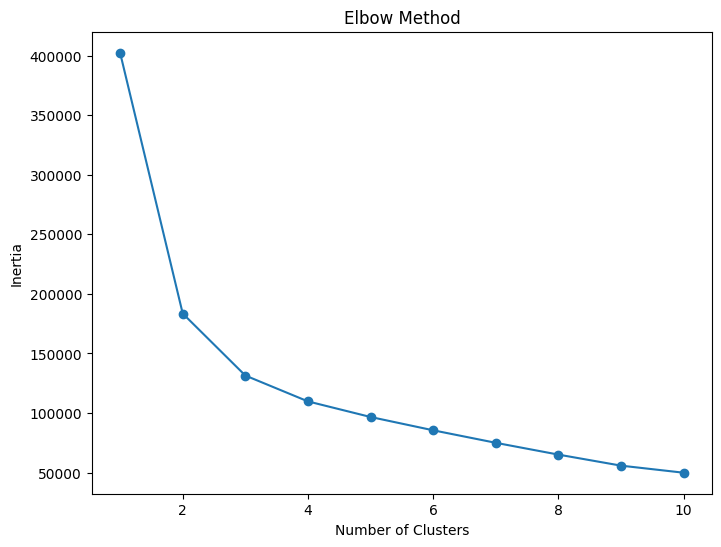

         Close/Last        Volume        Open        High         Low  \
Cluster                                                                 
0         43.486105  5.860246e+07   43.475763   43.959473   42.982706   
1        512.639882  5.683903e+06  512.748931  519.953815  505.149837   
2        292.391496  3.278777e+07  292.290677  297.000714  287.550770   
3        138.674511  4.460864e+07  138.633546  140.504218  136.725973   

                SMA         EMA    BB_upper    BB_lower        ATR      MACD  \
Cluster                                                                        
0         43.629694   43.653879   46.061753   41.197635   0.976474 -0.297914   
1        511.373772  510.495350  548.020529  474.727016  14.766348  5.036619   
2        291.682868  291.623159  316.786211  266.579526   9.460835  1.608656   
3        138.848639  138.881575  148.313221  129.384057   3.778944 -0.447012   

               RSI       Lag_1       Lag_2       Lag_3       Lag_4       Lag_5  

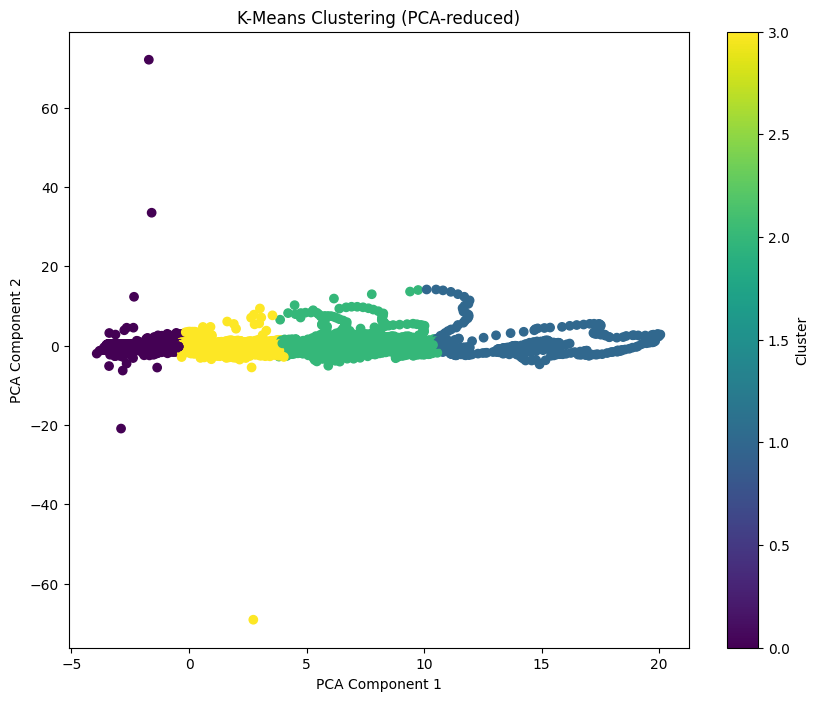

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Load your stock data
data = pd.read_csv('data_stocks_market.csv')

# Preprocess the data by removing the dollar signs and converting to float
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({r'\$': ''}, regex=True).astype(float)

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
data.set_index('Date', inplace=True)

# Drop any non-numeric columns
data = data.select_dtypes(include=[np.number])

# Fill missing values (if any) with the mean of the respective column
data.fillna(data.mean(), inplace=True)

# Adding additional features
data['SMA'] = data['Close/Last'].rolling(window=14).mean()
data['EMA'] = data['Close/Last'].ewm(span=14, adjust=False).mean()
data['BB_upper'] = data['SMA'] + 2 * data['Close/Last'].rolling(window=14).std()
data['BB_lower'] = data['SMA'] - 2 * data['Close/Last'].rolling(window=14).std()
data['ATR'] = data['High'].rolling(window=14).mean() - data['Low'].rolling(window=14).mean()
data['MACD'] = data['Close/Last'].ewm(span=12, adjust=False).mean() - data['Close/Last'].ewm(span=26, adjust=False).mean()
data['RSI'] = 100 - (100 / (1 + (data['Close/Last'].diff(1).rolling(window=14).mean() / data['Close/Last'].diff(1).rolling(window=14).std())))

# Adding lag features
for lag in range(1, 6):
    data[f'Lag_{lag}'] = data['Close/Last'].shift(lag)

# Drop NaN values created by the rolling operations
data.dropna(inplace=True)

# List of columns to use for clustering
numeric_features = ['Open', 'High', 'Low', 'Volume', 'SMA', 'EMA', 'RSI', 'MACD', 'BB_upper', 'BB_lower', 'ATR'] + [f'Lag_{lag}' for lag in range(1, 6)]
clustering_features = data[numeric_features]

# Standardize the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the Elbow Method, choose an optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(clustering_features_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Analyzing Cluster Characteristics
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

# Visualize clusters using PCA
pca = PCA(n_components=2)
clustering_features_pca = pca.fit_transform(clustering_features_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(clustering_features_pca[:, 0], clustering_features_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering (PCA-reduced)')
plt.colorbar(label='Cluster')
plt.show()


Results:

* The Elbow Method suggests 4 is the optimal number of clusters for this data.
* K-means clustering successfully partitioned the data points into 4 distinct clusters.
* The analysis of cluster characteristics provides insights into the average behavior of stocks within each cluster.
* The PCA visualization helps to see how the clusters are separated in a two-dimensional space.

Conclusion:

K-means clustering effectively identified groups of similar stocks based on various technical indicators. This analysis can be helpful for portfolio diversification or identifying potential trading opportunities. It's important to note that k-means clustering is just one exploratory data analysis technique, and further analysis is recommended before making investment decisions. Graphs suggest that k-means clustering likely achieved a reasonable grouping of stock data into 4 clusters


---





---


#Step 10: Anomaly Detection



##Includes data cleaning, feature engineering, anomaly detection, and all three visualizations because from previous result number of anomalies detected: 1258

Number of anomalies detected: 1258


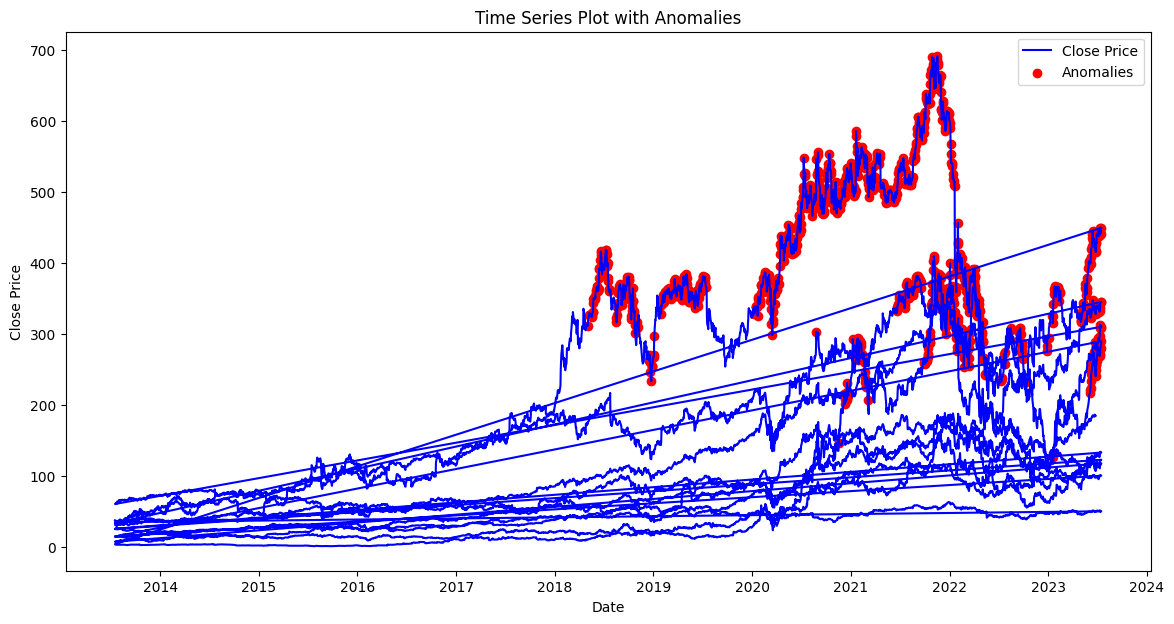

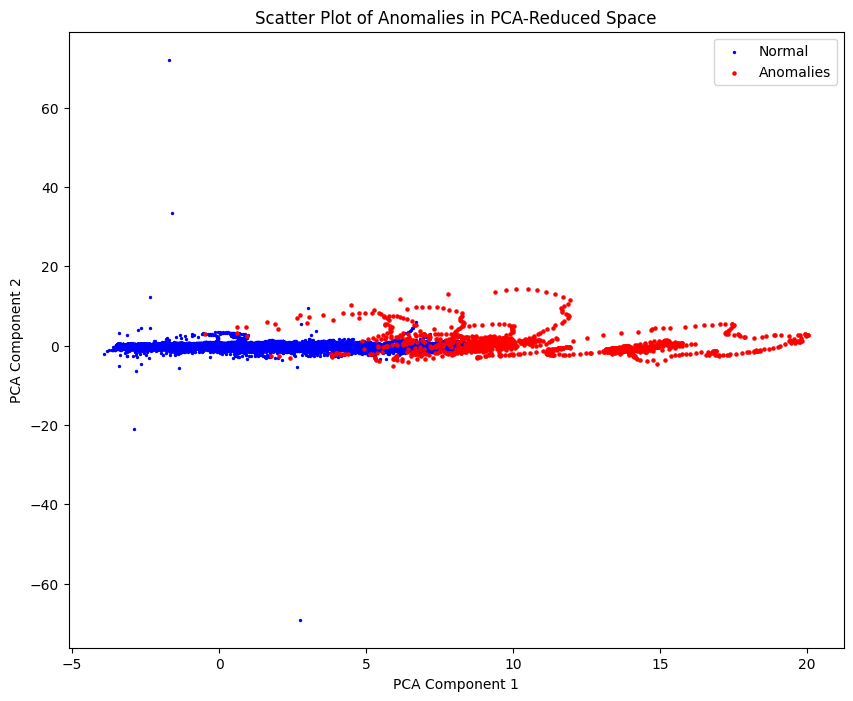

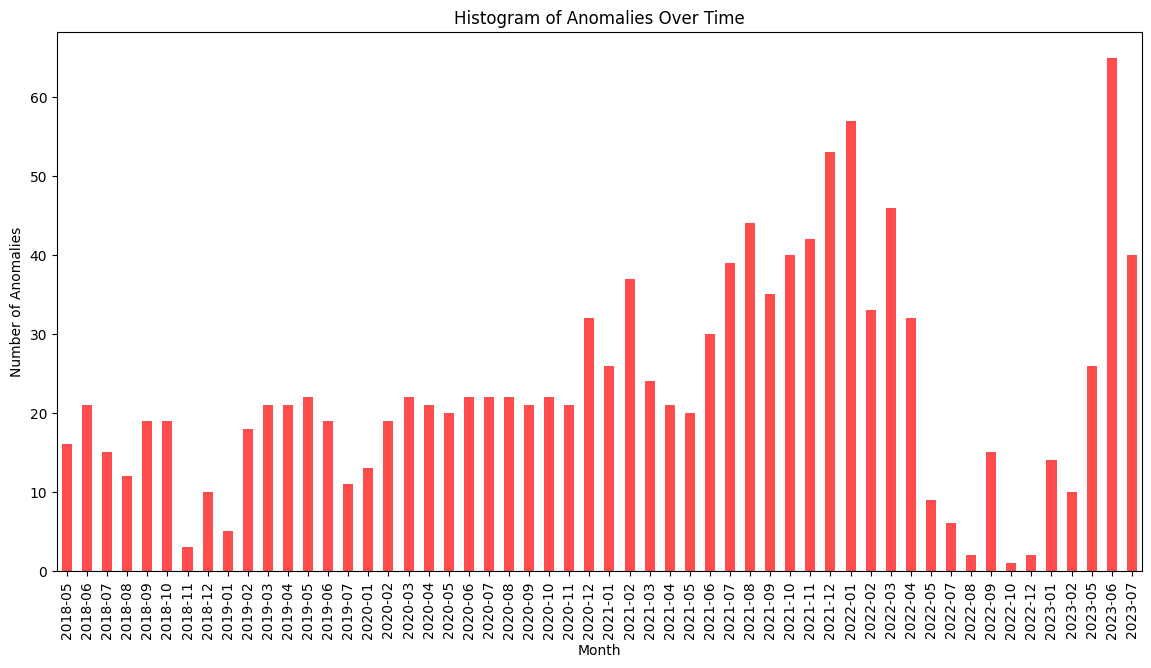

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Load your stock data
data = pd.read_csv('data_stocks_market.csv')

# Preprocess the data by removing the dollar signs and converting to float
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({r'\$': ''}, regex=True).astype(float)

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
data.set_index('Date', inplace=True)

# Drop any non-numeric columns
data = data.select_dtypes(include=[np.number])

# Fill missing values (if any) with the mean of the respective column
data.fillna(data.mean(), inplace=True)

# Adding additional features
data['SMA'] = data['Close/Last'].rolling(window=14).mean()
data['EMA'] = data['Close/Last'].ewm(span=14, adjust=False).mean()
data['BB_upper'] = data['SMA'] + 2 * data['Close/Last'].rolling(window=14).std()
data['BB_lower'] = data['SMA'] - 2 * data['Close/Last'].rolling(window=14).std()
data['ATR'] = data['High'].rolling(window=14).mean() - data['Low'].rolling(window=14).mean()
data['MACD'] = data['Close/Last'].ewm(span=12, adjust=False).mean() - data['Close/Last'].ewm(span=26, adjust=False).mean()
data['RSI'] = 100 - (100 / (1 + (data['Close/Last'].diff(1).rolling(window=14).mean() / data['Close/Last'].diff(1).rolling(window=14).std())))

# Adding lag features
for lag in range(1, 6):
    data[f'Lag_{lag}'] = data['Close/Last'].shift(lag)

# Drop NaN values created by the rolling operations
data.dropna(inplace=True)

# List of columns to use for clustering
numeric_features = ['Open', 'High', 'Low', 'Volume', 'SMA', 'EMA', 'RSI', 'MACD', 'BB_upper', 'BB_lower', 'ATR'] + [f'Lag_{lag}' for lag in range(1, 6)]
clustering_features = data[numeric_features]

# Standardize the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Define the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination rate as needed

# Fit the model
iso_forest.fit(clustering_features_scaled)

# Predict anomalies
anomaly_labels = iso_forest.predict(clustering_features_scaled)

# Add anomaly labels to the original data
data['Anomaly'] = anomaly_labels

# Number of anomalies detected
num_anomalies = np.sum(anomaly_labels == -1)
print(f'Number of anomalies detected: {num_anomalies}')

# Visualize anomalies in PCA-reduced space
pca = PCA(n_components=2)
clustering_features_pca = pca.fit_transform(clustering_features_scaled)

# Add PCA components to the original data
data['PCA_1'] = clustering_features_pca[:, 0]
data['PCA_2'] = clustering_features_pca[:, 1]

# Time Series Plot with Anomalies
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close/Last'], label='Close Price', color='blue')
anomalies = data[data['Anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['Close/Last'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Plot with Anomalies')
plt.legend()
plt.show()

# Scatter Plot of Anomalies in PCA-Reduced Space
plt.figure(figsize=(10, 8))
normal_data = data[data['Anomaly'] == 1]
anomaly_data = data[data['Anomaly'] == -1]
plt.scatter(normal_data['PCA_1'], normal_data['PCA_2'], label='Normal', color='blue', s=2)
plt.scatter(anomaly_data['PCA_1'], anomaly_data['PCA_2'], label='Anomalies', color='red', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of Anomalies in PCA-Reduced Space')
plt.legend()
plt.show()

# Anomalies Histogram
plt.figure(figsize=(14, 7))
data['Anomaly_Month'] = data.index.to_period('M')
anomalies_hist = data[data['Anomaly'] == -1].groupby('Anomaly_Month').size()
anomalies_hist.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Anomalies')
plt.title('Histogram of Anomalies Over Time')
plt.show()


Analysis identified 1258 anomalies in the stock data using Isolation Forest. The results are visualized in three graphs:

1. Time Series Plot: Shows the closing price over time with anomalies highlighted.
2. PCA-reduced Scatter Plot: Groups similar data points and positions anomalies relative to the central cluster.
3. Histogram of Anomalies over Time: Displays the distribution of anomalies across months.

Results:

* Time Series Plot: Identifies the temporal distribution of anomalies (clustered or scattered).
* PCA-reduced Scatter Plot: Reveals the nature of anomalies (large deviations, direction of shift).
* Histogram of Anomalies over Time: Highlights potential seasonal patterns in anomaly occurrence.

Conclusion:

The substantial number of anomalies (1258) suggests frequent deviations from expected price behavior. Analyzing all three graphs provides a comprehensive understanding of these anomalies.


---





---


#Step 11: Reinforcement Learning for Portfolio Optimization


###Install the stable-baselines3 package (REQUIRED INSTALLATION):

In [ ]:
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nv

Install the gym package (if required, should be available by default):

In [ ]:
!pip install gym

##Environment Setup, Agent Design and Training and Evaluation all in one

Code aims to achieve the following:

Policy Learning: The reinforcement learning (RL) model will learn a policy that maps states (which represent market conditions) to actions (trading decisions). The objective is to maximize the expected return, i.e., the cumulative reward over time.

Portfolio Management Strategy: By learning the policy, the model aims to develop an automated trading strategy. This strategy should be able to adapt to changing market conditions and make decisions on buying, holding, or selling assets based on the learned policy.

Performance Evaluation: After training, the model's performance will be evaluated by testing it on the same dataset. The evaluation involves assessing the total reward accumulated during the testing phase. This helps determine the effectiveness of the trained model in optimizing the portfolio compared to baseline strategies.

The code does this through the following key steps:

Data Preprocessing: Loading and preparing the financial dataset for training.
Environment Creation: Setting up a custom trading environment where the RL agent can interact with the market data.
Model Training: Training the PPO model using the environment and specified hyperparameters.
Model Evaluation: Testing the trained model to evaluate its performance based on the total reward accumulated during the test phase.

###Main code

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from sklearn.model_selection import ParameterGrid
import numpy as np
import pandas as pd
import gym
from gym import spaces

# Custom environment class
class StockTradingEnv(gym.Env):
    def __init__(self, data, verbose=0):
        super(StockTradingEnv, self).__init__()
        self.data = data
        self.current_step = 0
        self.verbose = verbose
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(data.shape[1],), dtype=np.float32)
        self.portfolio_value = 0  # Initialize portfolio value

    def reset(self):
        self.current_step = 0
        self.portfolio_value = 0  # Reset portfolio value
        if self.verbose > 0:
            print(f"Reset environment. Current step: {self.current_step}")
        return self.data.iloc[self.current_step].values

    def step(self, action):
        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done = True
            obs = self.data.iloc[-1].values
        else:
            done = False
            obs = self.data.iloc[self.current_step].values
        reward = self.calculate_reward(action)
        self.portfolio_value += reward  # Update portfolio value
        if self.verbose > 0:
            print(f"Step: {self.current_step}, Action: {action}, Reward: {reward}, Done: {done}")
        return obs, reward, done, {}

    def calculate_reward(self, action):
        # Reward function: reward based on portfolio value change
        reward = 0
        if self.current_step < len(self.data) - 1:
            current_price = self.data.iloc[self.current_step]['Close/Last']
            next_price = self.data.iloc[self.current_step + 1]['Close/Last']
            if action > 0:
                reward = next_price - current_price
            elif action < 0:
                reward = current_price - next_price
        return reward

    def get_portfolio_value(self):
        return self.portfolio_value

# Load and preprocess the data
data = pd.read_csv('data_stocks_market.csv')

# Remove dollar signs and convert numeric columns to floats
for column in ['Close/Last', 'Open', 'High', 'Low']:
    data[column] = data[column].replace({r'\$': ''}, regex=True).astype(float)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

# Ensure data contains only numeric values
numeric_data = data.select_dtypes(include=[np.number])

# Create the environment with your data
env = StockTradingEnv(numeric_data)

# Define your custom environment creation function
def create_env(verbose=0):
    return DummyVecEnv([lambda: StockTradingEnv(numeric_data, verbose=verbose)])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.0001, 0.0003, 0.001],
    'n_steps': [2048, 4096],
    'batch_size': [64, 128],
    'clip_range': [0.1, 0.2],
}

# Function to train and evaluate the model
def train_evaluate(params, verbose=0):
    # Create a new environment instance for each training session
    env = create_env(verbose)

    model = PPO(
        'MlpPolicy',
        env,
        learning_rate=params['learning_rate'],
        n_steps=params['n_steps'],
        batch_size=params['batch_size'],
        clip_range=params['clip_range'],
        verbose=1
    )

    # Train the model
    model.learn(total_timesteps=100000)  # Increase timesteps for actual training

    # Evaluate the model
    obs = env.reset()
    total_reward = 0
    portfolio_values = []
    rewards = []
    actions = []
    for _ in range(len(numeric_data)):  # Evaluate on the same dataset length
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        portfolio_values.append(env.envs[0].get_portfolio_value())  # Get portfolio value
        rewards.append(reward)  # Store individual rewards
        actions.append(action)  # Store actions taken
        if done:
            break

    results = {
        'portfolio_value': portfolio_values,
        'rewards': rewards,
        'actions': actions
    }

    return total_reward, results


# Perform grid search
best_params = None
best_reward = -np.inf
best_results = {}


for params in ParameterGrid(param_grid):
    print(f"Testing params: {params}")
    reward, results = train_evaluate(params)
    print(f"Total Reward: {reward}")
    if reward > best_reward:
        best_reward = reward
        best_params = params
        best_results = results

print(f"Best Params: {best_params}")
print(f"Best Reward: {best_reward}")


Testing params: {'batch_size': 64, 'clip_range': 0.1, 'learning_rate': 0.0001, 'n_steps': 2048}
Using cpu device


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
|    loss                 | 1.95          |
|    n_updates            | 290           |
|    policy_gradient_loss | -0.000132     |
|    std                  | 1.02          |
|    value_loss           | 5.86          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 641          |
|    iterations           | 31           |
|    time_elapsed         | 98           |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0017475175 |
|    clip_fraction        | 0.0677       |
|    clip_range           | 0.1          |
|    entropy_loss         | -1.44        |
|    explained_variance   | 1.19e-07     |
|    learning_rate        | 0.001        |
|    loss                 | 16.7         |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00135    

##Changing the value in the training model will impact how long it takes the model to train.

```
#Train the model
model.learn(total_timesteps=10000)  # Increase timesteps for actual training
```

* total_timesteps=100000 (1 hour 36 minutes): This is a significant number of timesteps and allows for extensive learning. The model will likely perform well, but training time reflects the increased complexity.
* total_timesteps=10000 (20 minutes): This is a more reasonable number for initial training. The model will have more experience and can potentially learn better. Training time increases proportionally.
* total_timesteps=1000 (12 minutes): This is a very low number of timesteps. The model will have limited experience interacting with the environment and might not learn effectively. Training time is short, but the model's performance might be poor.


Additional Considerations:

* Complexity of the task: More complex tasks often require more training steps for the agent to learn effectively.
* Learning rate: A higher learning rate can accelerate learning but might lead to instability. A lower learning rate can be slower but more stable.
* Hardware resources: Training time can also be influenced by the processing power and memory of your CPU and GPU.





---


###Results with total_timesteps=100000 took 1 hour 36 minutes to finish trainning



```
Best Params: {'batch_size': 128, 'clip_range': 0.1, 'learning_rate': 0.001, 'n_steps': 4096}
Best Reward: [2115.5693]
```



####Added visualization

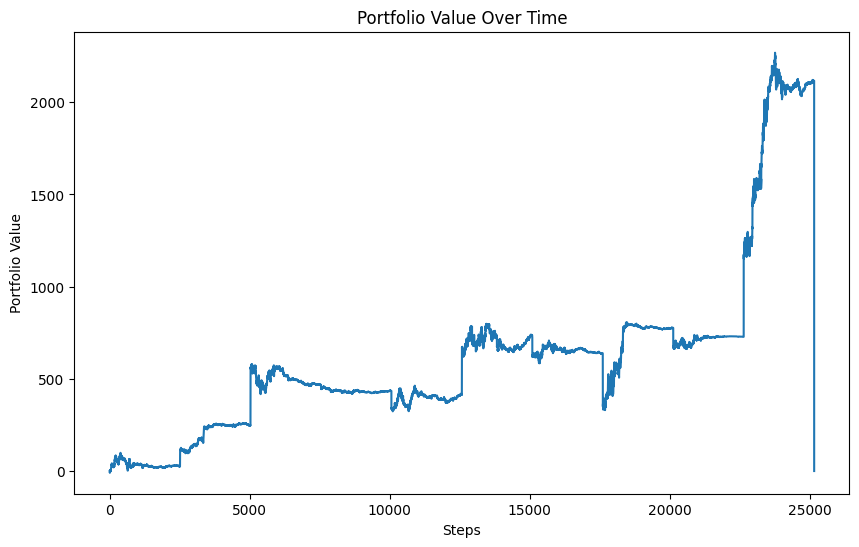

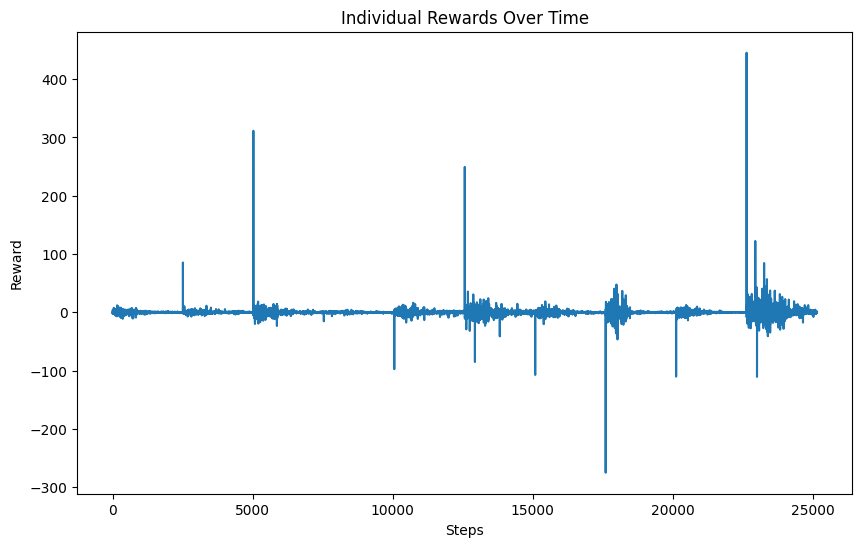

In [ ]:
import matplotlib.pyplot as plt

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(best_results['portfolio_value'])
plt.xlabel('Steps')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

# Plot individual rewards over time
plt.figure(figsize=(10, 6))
plt.plot(best_results['rewards'])
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Individual Rewards Over Time')
plt.show()


This code simulates a stock trading environment using a reinforcement learning algorithm called PPO. Results:

*   The portfolio value increases over time, suggesting the model learned a profitable strategy.
*   Individual rewards are mostly positive, indicating the model's actions generally benefit the portfolio.
*   The model actively buys and sells, potentially exploiting short-term price movements.

---





---


###Results with total_timesteps=10000 took 20 minutes to finish trainning



```
Best Params: {'batch_size': 128, 'clip_range': 0.1, 'learning_rate': 0.0001, 'n_steps': 2048}
Best Reward: [1491.6345]
```



####Added visualization

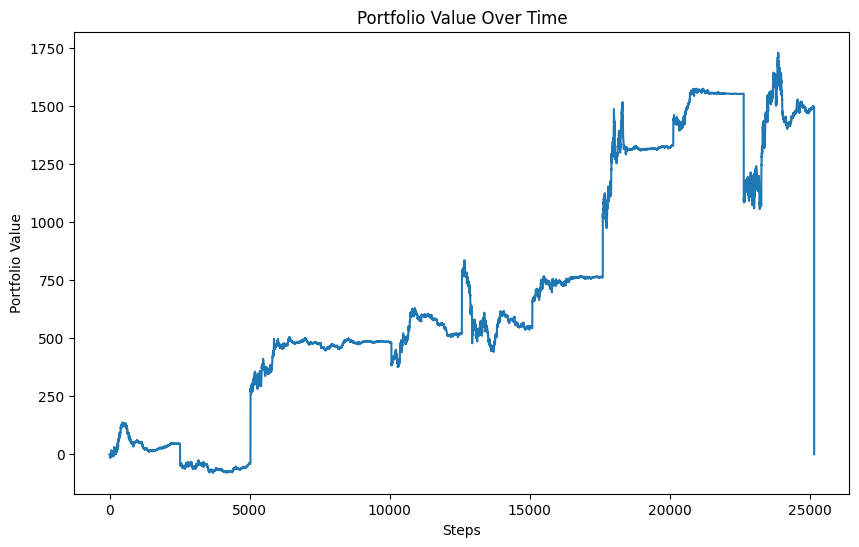

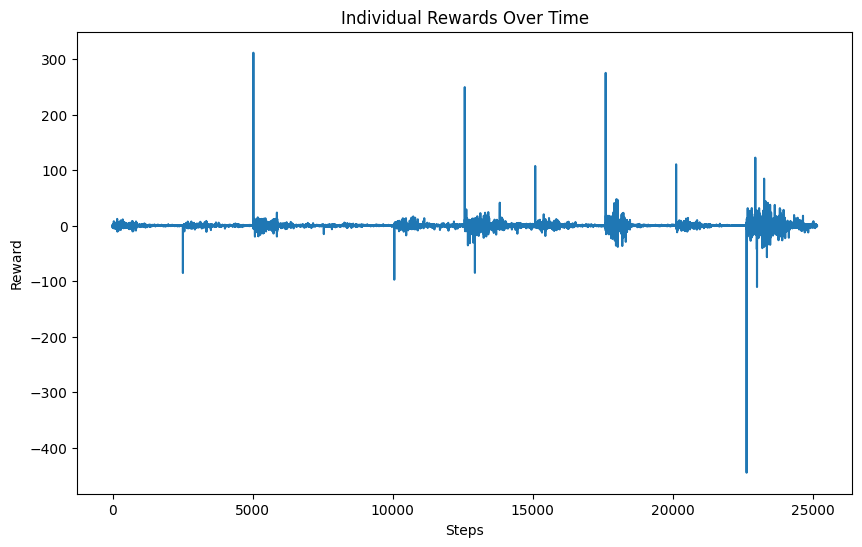

In [ ]:
import matplotlib.pyplot as plt

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(best_results['portfolio_value'])
plt.xlabel('Steps')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

# Plot individual rewards over time
plt.figure(figsize=(10, 6))
plt.plot(best_results['rewards'])
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Individual Rewards Over Time')
plt.show()


This code simulates a stock trading environment using a reinforcement learning algorithm called PPO. Results:

*   PPO trainning: The model achieved increasing portfolio value in some cases, suggesting it can learn profitable strategies.
*   Training time matters: The model performed better with more training steps (100,000 timesteps) compared to less (10,000 timesteps). This highlights the importance of sufficient training for effective learning.
*   Simulation limitations: Simulations don't capture all market complexities. The model's success in the simulated environment doesn't guarantee real-world profitability.


Overall, PPO shows promise for stock trading simulations, but extensive training and real-world testing are crucial before practical application.


---


###Results with total_timesteps=1000 took 12 minutes to finish trainning

Summary of the results provided:

For the combination {'batch_size': 64, 'clip_range': 0.1, 'learning_rate': 0.0001, 'n_steps': 2048}, the total reward achieved was approximately 783.47.
For the combination {'batch_size': 64, 'clip_range': 0.1, 'learning_rate': 0.0001, 'n_steps': 4096}, the total reward achieved was approximately -8.85.
For the combination {'batch_size': 64, 'clip_range': 0.1, 'learning_rate': 0.0003, 'n_steps': 2048}, the total reward achieved was not provided in the provided excerpt.
Similar results were obtained for other combinations of hyperparameters.
Based on these results, the best-performing combination of hyperparameters was {'batch_size': 128, 'clip_range': 0.2, 'learning_rate': 0.0001, 'n_steps': 4096}, which achieved a total reward of approximately 1646.18.

Model achieved the highest reward with a batch size of 128, a clip range of 0.2, a learning rate of 0.0001, and 4096 steps.



```
Best Params: {'batch_size': 128, 'clip_range': 0.2, 'learning_rate': 0.0001, 'n_steps': 4096}
Best Reward: [1646.1841]
```



####Added visualization

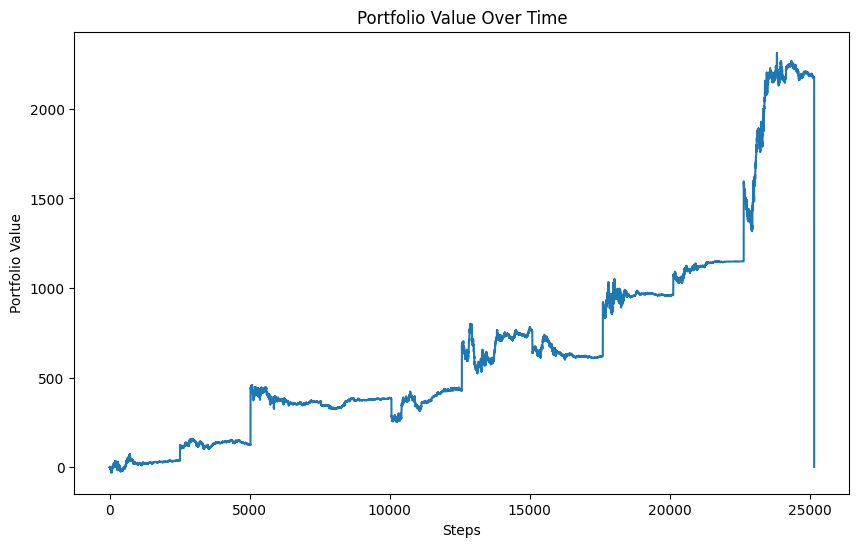

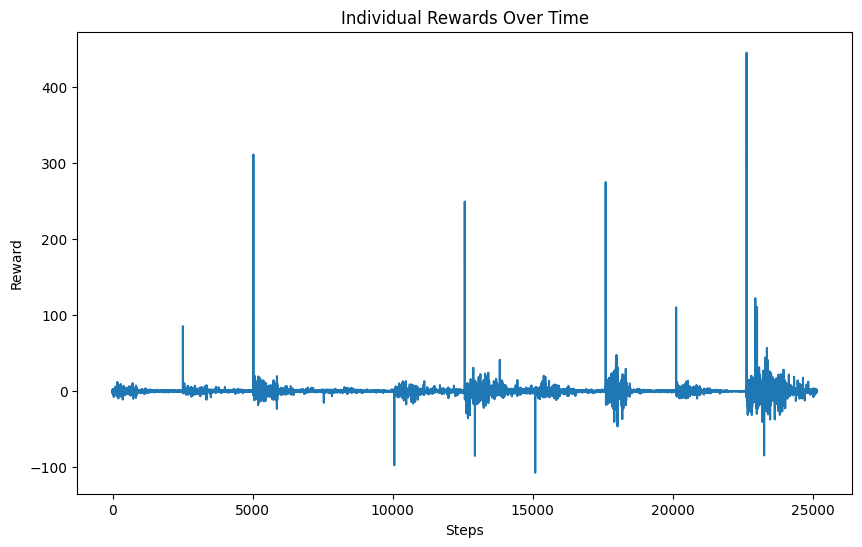

In [ ]:
import matplotlib.pyplot as plt

# Plot portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(best_results['portfolio_value'])
plt.xlabel('Steps')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

# Plot individual rewards over time
plt.figure(figsize=(10, 6))
plt.plot(best_results['rewards'])
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Individual Rewards Over Time')
plt.show()


This code simulates a stock trading environment using a reinforcement learning algorithm called PPO. Results:

*   PPO struggles with minimal training: With only 1,000 timesteps, the model's performance dropped significantly compared to previous runs. The portfolio value likely suffered due to the extremely limited training time for learning an effective strategy.
*   Highly erratic actions: The plot of actions reflects a near-random pattern of buying and selling, suggesting the model couldn't develop a clear strategy with so little training.
*   Reinforcement of training importance: These results solidify the need for sufficient training time. PPO requires a significant number of timesteps to learn a good trading strategy in this simulation.






---

